##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 합성곱 신경망

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">     <img src="https://www.tensorflow.org/images/tf_logo_32px.png">     TensorFlow.org에서 보기</a>   </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/cnn.ipynb">     <img src="https://www.tensorflow.org/images/colab_logo_32px.png">     구글 코랩(Colab)에서 실행하기</a>   </td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/cnn.ipynb">     <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">     깃허브(GitHub) 소스 보기</a>   </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Download notebook</a>   </td>
</table>

이 튜토리얼은 MNIST 숫자를 분류하기 위해 간단한 [합성곱 신경망](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network)(Convolutional Neural Network, CNN)을 훈련합니다. 간단한 이 네트워크는 MNIST 테스트 세트에서 99% 정확도를 달성할 것입니다. 이 튜토리얼은 [케라스 Sequential API](https://www.cs.toronto.edu/~kriz/cifar.html)를 사용하기 때문에 몇 줄의 코드만으로 모델을 만들고 훈련할 수 있습니다.


### 텐서플로 임포트하기

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2022-12-15 01:20:57.839164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-15 01:20:57.839284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-15 01:20:57.839295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


### MNIST 데이터셋 다운로드하고 준비하기

CIFAR10 데이터세트에는 10개 클래스에 60,000개의 컬러 이미지가 포함되어 있으며 각 클래스에는 6,000개의 이미지가 있습니다. 이 데이터세트는 50,000개의 훈련 이미지와 10,000개의 테스트 이미지로 나뉩니다. 클래스는 상호 배타적이며 서로 겹치지 않습니다.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

     8192/170498071 [..............................] - ETA: 0s

   204800/170498071 [..............................] - ETA: 58s

  1032192/170498071 [..............................] - ETA: 19s

  4128768/170498071 [..............................] - ETA: 6s 

  9666560/170498071 [>.............................] - ETA: 3s

 15171584/170498071 [=>............................] - ETA: 2s

 18841600/170498071 [==>...........................] - ETA: 2s

 23273472/170498071 [===>..........................] - ETA: 2s

 28860416/170498071 [====>.........................] - ETA: 2s

 34390016/170498071 [=====>........................] - ETA: 1s

 39133184/170498071 [=====>........................] - ETA: 1s

 42418176/170498071 [======>.......................] - ETA: 1s

 47865856/170498071 [=======>......................] - ETA: 1s

 53075968/170498071 [========>.....................] - ETA: 1s

 57311232/170498071 [=========>....................] - ETA: 1s

 60317696/170498071 [=========>....................] - ETA: 1s

 65298432/170498071 [==========>...................] - ETA: 1s

 70336512/170498071 [===========>..................] - ETA: 1s

 75382784/170498071 [============>.................] - ETA: 1s

 78733312/170498071 [============>.................] - ETA: 1s

 83034112/170498071 [=============>................] - ETA: 1s

 88219648/170498071 [==============>...............] - ETA: 1s

 93184000/170498071 [===============>..............] - ETA: 0s

 97198080/170498071 [================>.............] - ETA: 0s

100753408/170498071 [================>.............] - ETA: 0s

106020864/170498071 [=================>............] - ETA: 0s

111198208/170498071 [==================>...........] - ETA: 0s

116187136/170498071 [===================>..........] - ETA: 0s

119218176/170498071 [===================>..........] - ETA: 0s

124002304/170498071 [====================>.........] - ETA: 0s

127926272/170498071 [=====================>........] - ETA: 0s

131629056/170498071 [======================>.......] - ETA: 0s

134553600/170498071 [======================>.......] - ETA: 0s

138338304/170498071 [=======================>......] - ETA: 0s

142155776/170498071 [========================>.....] - ETA: 0s

145965056/170498071 [========================>.....] - ETA: 0s

149389312/170498071 [=========================>....] - ETA: 0s

152731648/170498071 [=========================>....] - ETA: 0s

156598272/170498071 [==========================>...] - ETA: 0s

160563200/170498071 [===========================>..] - ETA: 0s

164028416/170498071 [===========================>..] - ETA: 0s

167747584/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 2s 0us/step


### 데이터 확인하기

데이터세트가 올바른지 확인하기 위해 훈련 세트의 처음 25개 이미지를 플로팅하고 각 이미지 아래에 클래스 이름을 표시해 보겠습니다.


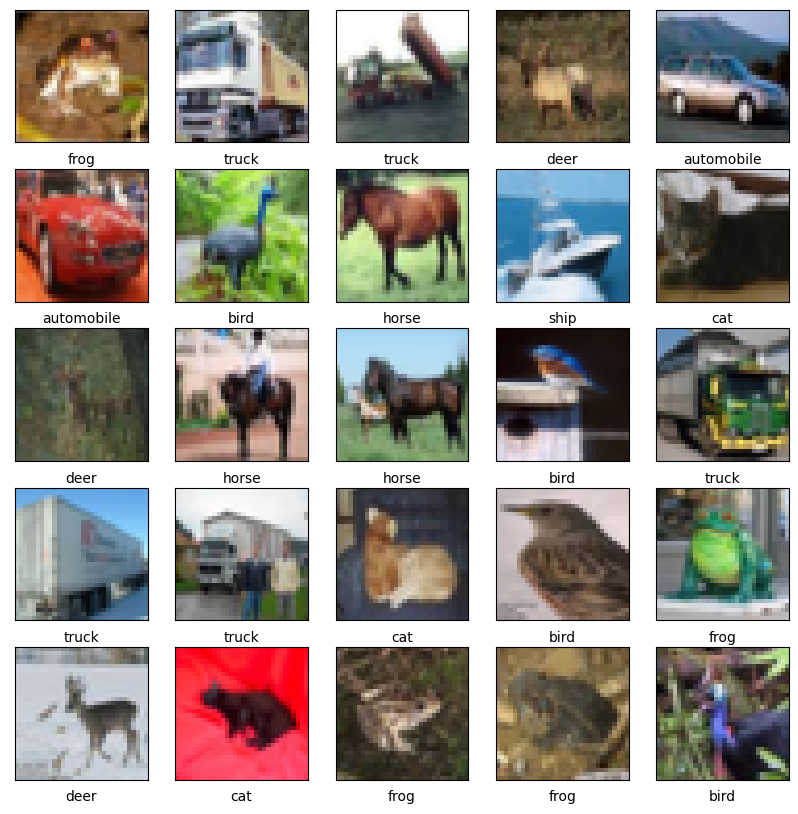

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### 합성곱 층 만들기

아래 6줄의 코드에서 [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) 층을 쌓는 일반적인 패턴으로 합성곱 층을 정의합니다.

입력으로 CNN은 배치 크기를 무시하고 형상(image_height, image_width, color_channels)의 텐서를 사용합니다. 이러한 차원을 처음 접하는 경우 color_channels는 (R,G,B)를 나타냅니다. 이 예에서는 CIFAR 이미지 형식인 형상(32, 32, 3)의 입력을 처리하도록 CNN을 구성합니다. `input_shape` 인수를 첫 번째 레이어에 전달하여 이를 수행할 수 있습니다.


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

지금까지 모델의 아키텍처를 표시해 보겠습니다.

In [6]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 30, 30, 32)        896       


 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         


 )                                                               


 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         


 2D)                                                             


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


Total params: 56,320


Trainable params: 56,320


Non-trainable params: 0


_________________________________________________________________


위에서 Conv2D와 MaxPooling2D 층의 출력은 (높이, 너비, 채널) 크기의 3D 텐서입니다. 높이와 너비 차원은 네트워크가 깊어질수록 감소하는 경향을 가집니다. Conv2D 층에서 출력 채널의 수는 첫 번째 매개변수에 의해 결정됩니다(예를 들면, 32 또는 64). 일반적으로 높이와 너비가 줄어듦에 따라 (계산 비용 측면에서) Conv2D 층의 출력 채널을 늘릴 수 있습니다.

### 마지막에 Dense 층 추가하기

모델을 완성하려면 마지막 합성곱 층의 출력 텐서(크기 (4, 4, 64))를 하나 이상의 Dense 층에 주입하여 분류를 수행합니다. Dense 층은 벡터(1D)를 입력으로 받는데 현재 출력은 3D 텐서입니다. 먼저 3D 출력을 1D로 펼치겠습니다. 그다음 하나 이상의 Dense 층을 그 위에 추가하겠습니다. MNIST 데이터는 10개의 클래스가 있으므로 마지막에 Dense 층에 10개의 출력과 소프트맥스 활성화 함수를 사용합니다.

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

다음은 모델의 전체 아키텍처입니다.

In [8]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 30, 30, 32)        896       


 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         


 )                                                               


 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     


 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         


 2D)                                                             


 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     


 flatten (Flatten)           (None, 1024)              0         


 dense (Dense)               (None, 64)                65600     


 dense_1 (Dense)             (None, 10)                650       


Total params: 122,570


Trainable params: 122,570


Non-trainable params: 0


_________________________________________________________________


네트워크 요약은 (4, 4, 64) 출력이 두 개의 Dense 레이어를 거치기 전에 (1024) 형상의 벡터로 평면화되었음을 보여줍니다.

### 모델 컴파일과 훈련하기

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


   1/1563 [..............................] - ETA: 1:33:08 - loss: 2.3045 - accuracy: 0.0938

  13/1563 [..............................] - ETA: 6s - loss: 2.3078 - accuracy: 0.1154     

  26/1563 [..............................] - ETA: 6s - loss: 2.3003 - accuracy: 0.1178

  39/1563 [..............................] - ETA: 6s - loss: 2.2826 - accuracy: 0.1298

  52/1563 [..............................] - ETA: 6s - loss: 2.2685 - accuracy: 0.1286

  65/1563 [>.............................] - ETA: 6s - loss: 2.2454 - accuracy: 0.1385

  78/1563 [>.............................] - ETA: 6s - loss: 2.2123 - accuracy: 0.1522

  91/1563 [>.............................] - ETA: 6s - loss: 2.1869 - accuracy: 0.1593

 104/1563 [>.............................] - ETA: 5s - loss: 2.1567 - accuracy: 0.1725

 117/1563 [=>............................] - ETA: 5s - loss: 2.1317 - accuracy: 0.1782

 131/1563 [=>............................] - ETA: 5s - loss: 2.1150 - accuracy: 0.1832

 144/1563 [=>............................] - ETA: 5s - loss: 2.0970 - accuracy: 0.1929

 157/1563 [==>...........................] - ETA: 5s - loss: 2.0735 - accuracy: 0.2034

 170/1563 [==>...........................] - ETA: 5s - loss: 2.0583 - accuracy: 0.2118

 183/1563 [==>...........................] - ETA: 5s - loss: 2.0413 - accuracy: 0.2205

 196/1563 [==>...........................] - ETA: 5s - loss: 2.0270 - accuracy: 0.2251

 209/1563 [===>..........................] - ETA: 5s - loss: 2.0165 - accuracy: 0.2273

 222/1563 [===>..........................] - ETA: 5s - loss: 2.0051 - accuracy: 0.2324

 235/1563 [===>..........................] - ETA: 5s - loss: 1.9878 - accuracy: 0.2399

 248/1563 [===>..........................] - ETA: 5s - loss: 1.9719 - accuracy: 0.2480

 261/1563 [====>.........................] - ETA: 5s - loss: 1.9575 - accuracy: 0.2547

 274/1563 [====>.........................] - ETA: 5s - loss: 1.9525 - accuracy: 0.2578

 287/1563 [====>.........................] - ETA: 5s - loss: 1.9459 - accuracy: 0.2608

 300/1563 [====>.........................] - ETA: 5s - loss: 1.9366 - accuracy: 0.2655

 312/1563 [====>.........................] - ETA: 5s - loss: 1.9279 - accuracy: 0.2708

 325/1563 [=====>........................] - ETA: 4s - loss: 1.9171 - accuracy: 0.2760

 338/1563 [=====>........................] - ETA: 4s - loss: 1.9080 - accuracy: 0.2793

 351/1563 [=====>........................] - ETA: 4s - loss: 1.9007 - accuracy: 0.2829

 364/1563 [=====>........................] - ETA: 4s - loss: 1.8884 - accuracy: 0.2874

 377/1563 [======>.......................] - ETA: 4s - loss: 1.8806 - accuracy: 0.2898

 390/1563 [======>.......................] - ETA: 4s - loss: 1.8706 - accuracy: 0.2953

 403/1563 [======>.......................] - ETA: 4s - loss: 1.8601 - accuracy: 0.2990

 416/1563 [======>.......................] - ETA: 4s - loss: 1.8514 - accuracy: 0.3025

 429/1563 [=======>......................] - ETA: 4s - loss: 1.8491 - accuracy: 0.3051

 442/1563 [=======>......................] - ETA: 4s - loss: 1.8414 - accuracy: 0.3080

 455/1563 [=======>......................] - ETA: 4s - loss: 1.8321 - accuracy: 0.3120

 468/1563 [=======>......................] - ETA: 4s - loss: 1.8242 - accuracy: 0.3151

 481/1563 [========>.....................] - ETA: 4s - loss: 1.8167 - accuracy: 0.3184

 494/1563 [========>.....................] - ETA: 4s - loss: 1.8103 - accuracy: 0.3209

 507/1563 [========>.....................] - ETA: 4s - loss: 1.8058 - accuracy: 0.3237

 520/1563 [========>.....................] - ETA: 4s - loss: 1.8003 - accuracy: 0.3258

 533/1563 [=========>....................] - ETA: 4s - loss: 1.7955 - accuracy: 0.3282

 546/1563 [=========>....................] - ETA: 4s - loss: 1.7882 - accuracy: 0.3309

 559/1563 [=========>....................] - ETA: 4s - loss: 1.7838 - accuracy: 0.3330

 572/1563 [=========>....................] - ETA: 3s - loss: 1.7758 - accuracy: 0.3360

 585/1563 [==========>...................] - ETA: 3s - loss: 1.7684 - accuracy: 0.3396

 598/1563 [==========>...................] - ETA: 3s - loss: 1.7631 - accuracy: 0.3421

 611/1563 [==========>...................] - ETA: 3s - loss: 1.7568 - accuracy: 0.3445

 624/1563 [==========>...................] - ETA: 3s - loss: 1.7508 - accuracy: 0.3468

 637/1563 [===========>..................] - ETA: 3s - loss: 1.7459 - accuracy: 0.3490

 650/1563 [===========>..................] - ETA: 3s - loss: 1.7399 - accuracy: 0.3517

 663/1563 [===========>..................] - ETA: 3s - loss: 1.7338 - accuracy: 0.3534

 676/1563 [===========>..................] - ETA: 3s - loss: 1.7278 - accuracy: 0.3554

 690/1563 [============>.................] - ETA: 3s - loss: 1.7207 - accuracy: 0.3583

 703/1563 [============>.................] - ETA: 3s - loss: 1.7160 - accuracy: 0.3608

 716/1563 [============>.................] - ETA: 3s - loss: 1.7116 - accuracy: 0.3625

 729/1563 [============>.................] - ETA: 3s - loss: 1.7065 - accuracy: 0.3651

 742/1563 [=============>................] - ETA: 3s - loss: 1.7017 - accuracy: 0.3673

 755/1563 [=============>................] - ETA: 3s - loss: 1.6986 - accuracy: 0.3684

 768/1563 [=============>................] - ETA: 3s - loss: 1.6951 - accuracy: 0.3696

 781/1563 [=============>................] - ETA: 3s - loss: 1.6926 - accuracy: 0.3714

 794/1563 [==============>...............] - ETA: 3s - loss: 1.6891 - accuracy: 0.3728

 807/1563 [==============>...............] - ETA: 3s - loss: 1.6851 - accuracy: 0.3744

 819/1563 [==============>...............] - ETA: 2s - loss: 1.6810 - accuracy: 0.3758

 832/1563 [==============>...............] - ETA: 2s - loss: 1.6766 - accuracy: 0.3780

 845/1563 [===============>..............] - ETA: 2s - loss: 1.6719 - accuracy: 0.3803

 858/1563 [===============>..............] - ETA: 2s - loss: 1.6683 - accuracy: 0.3816

 871/1563 [===============>..............] - ETA: 2s - loss: 1.6643 - accuracy: 0.3830

 884/1563 [===============>..............] - ETA: 2s - loss: 1.6597 - accuracy: 0.3848

 897/1563 [================>.............] - ETA: 2s - loss: 1.6556 - accuracy: 0.3863

 910/1563 [================>.............] - ETA: 2s - loss: 1.6527 - accuracy: 0.3876

 923/1563 [================>.............] - ETA: 2s - loss: 1.6495 - accuracy: 0.3890

 936/1563 [================>.............] - ETA: 2s - loss: 1.6457 - accuracy: 0.3902

 949/1563 [=================>............] - ETA: 2s - loss: 1.6422 - accuracy: 0.3922

 962/1563 [=================>............] - ETA: 2s - loss: 1.6386 - accuracy: 0.3935

 975/1563 [=================>............] - ETA: 2s - loss: 1.6351 - accuracy: 0.3951

 988/1563 [=================>............] - ETA: 2s - loss: 1.6330 - accuracy: 0.3964

1001/1563 [==================>...........] - ETA: 2s - loss: 1.6293 - accuracy: 0.3980

1014/1563 [==================>...........] - ETA: 2s - loss: 1.6268 - accuracy: 0.3990

1027/1563 [==================>...........] - ETA: 2s - loss: 1.6244 - accuracy: 0.4001

1040/1563 [==================>...........] - ETA: 2s - loss: 1.6217 - accuracy: 0.4011

1053/1563 [===================>..........] - ETA: 2s - loss: 1.6182 - accuracy: 0.4027

1066/1563 [===================>..........] - ETA: 1s - loss: 1.6149 - accuracy: 0.4039

1079/1563 [===================>..........] - ETA: 1s - loss: 1.6126 - accuracy: 0.4047

1092/1563 [===================>..........] - ETA: 1s - loss: 1.6093 - accuracy: 0.4065

1105/1563 [====================>.........] - ETA: 1s - loss: 1.6069 - accuracy: 0.4076

1118/1563 [====================>.........] - ETA: 1s - loss: 1.6039 - accuracy: 0.4085

1132/1563 [====================>.........] - ETA: 1s - loss: 1.6014 - accuracy: 0.4095

1145/1563 [====================>.........] - ETA: 1s - loss: 1.5988 - accuracy: 0.4104

1158/1563 [=====================>........] - ETA: 1s - loss: 1.5955 - accuracy: 0.4118

1172/1563 [=====================>........] - ETA: 1s - loss: 1.5923 - accuracy: 0.4132

1185/1563 [=====================>........] - ETA: 1s - loss: 1.5906 - accuracy: 0.4140

1198/1563 [=====================>........] - ETA: 1s - loss: 1.5870 - accuracy: 0.4156

1211/1563 [======================>.......] - ETA: 1s - loss: 1.5847 - accuracy: 0.4167

1224/1563 [======================>.......] - ETA: 1s - loss: 1.5824 - accuracy: 0.4177

1237/1563 [======================>.......] - ETA: 1s - loss: 1.5805 - accuracy: 0.4186

1250/1563 [======================>.......] - ETA: 1s - loss: 1.5769 - accuracy: 0.4201

1263/1563 [=======================>......] - ETA: 1s - loss: 1.5741 - accuracy: 0.4213

1276/1563 [=======================>......] - ETA: 1s - loss: 1.5711 - accuracy: 0.4222

1289/1563 [=======================>......] - ETA: 1s - loss: 1.5692 - accuracy: 0.4232

1302/1563 [=======================>......] - ETA: 1s - loss: 1.5660 - accuracy: 0.4246

1315/1563 [========================>.....] - ETA: 0s - loss: 1.5631 - accuracy: 0.4255

1328/1563 [========================>.....] - ETA: 0s - loss: 1.5602 - accuracy: 0.4267

1341/1563 [========================>.....] - ETA: 0s - loss: 1.5579 - accuracy: 0.4275

1353/1563 [========================>.....] - ETA: 0s - loss: 1.5559 - accuracy: 0.4285

1366/1563 [=========================>....] - ETA: 0s - loss: 1.5526 - accuracy: 0.4297

1379/1563 [=========================>....] - ETA: 0s - loss: 1.5505 - accuracy: 0.4306

1392/1563 [=========================>....] - ETA: 0s - loss: 1.5491 - accuracy: 0.4312

1405/1563 [=========================>....] - ETA: 0s - loss: 1.5461 - accuracy: 0.4323

1418/1563 [==========================>...] - ETA: 0s - loss: 1.5447 - accuracy: 0.4333

1431/1563 [==========================>...] - ETA: 0s - loss: 1.5421 - accuracy: 0.4342

1445/1563 [==========================>...] - ETA: 0s - loss: 1.5398 - accuracy: 0.4352

1458/1563 [==========================>...] - ETA: 0s - loss: 1.5376 - accuracy: 0.4361

1471/1563 [===========================>..] - ETA: 0s - loss: 1.5357 - accuracy: 0.4369

1484/1563 [===========================>..] - ETA: 0s - loss: 1.5332 - accuracy: 0.4378

1497/1563 [===========================>..] - ETA: 0s - loss: 1.5311 - accuracy: 0.4387

1510/1563 [===========================>..] - ETA: 0s - loss: 1.5290 - accuracy: 0.4397

1523/1563 [============================>.] - ETA: 0s - loss: 1.5266 - accuracy: 0.4408

1536/1563 [============================>.] - ETA: 0s - loss: 1.5241 - accuracy: 0.4420

1549/1563 [============================>.] - ETA: 0s - loss: 1.5209 - accuracy: 0.4432

1562/1563 [============================>.] - ETA: 0s - loss: 1.5189 - accuracy: 0.4442

1563/1563 [==============================] - 11s 5ms/step - loss: 1.5189 - accuracy: 0.4442 - val_loss: 1.2819 - val_accuracy: 0.5381


Epoch 2/10


   1/1563 [..............................] - ETA: 8s - loss: 1.2852 - accuracy: 0.5938

  14/1563 [..............................] - ETA: 6s - loss: 1.3335 - accuracy: 0.5446

  27/1563 [..............................] - ETA: 6s - loss: 1.2663 - accuracy: 0.5544

  40/1563 [..............................] - ETA: 5s - loss: 1.2594 - accuracy: 0.5625

  53/1563 [>.............................] - ETA: 5s - loss: 1.2298 - accuracy: 0.5690

  66/1563 [>.............................] - ETA: 5s - loss: 1.2302 - accuracy: 0.5620

  79/1563 [>.............................] - ETA: 5s - loss: 1.2376 - accuracy: 0.5637

  93/1563 [>.............................] - ETA: 5s - loss: 1.2383 - accuracy: 0.5642

 107/1563 [=>............................] - ETA: 5s - loss: 1.2320 - accuracy: 0.5663

 120/1563 [=>............................] - ETA: 5s - loss: 1.2231 - accuracy: 0.5690

 133/1563 [=>............................] - ETA: 5s - loss: 1.2244 - accuracy: 0.5684

 146/1563 [=>............................] - ETA: 5s - loss: 1.2171 - accuracy: 0.5711

 159/1563 [==>...........................] - ETA: 5s - loss: 1.2153 - accuracy: 0.5708

 172/1563 [==>...........................] - ETA: 5s - loss: 1.2106 - accuracy: 0.5718

 185/1563 [==>...........................] - ETA: 5s - loss: 1.2152 - accuracy: 0.5688

 198/1563 [==>...........................] - ETA: 5s - loss: 1.2143 - accuracy: 0.5694

 211/1563 [===>..........................] - ETA: 5s - loss: 1.2086 - accuracy: 0.5714

 224/1563 [===>..........................] - ETA: 5s - loss: 1.2094 - accuracy: 0.5702

 237/1563 [===>..........................] - ETA: 5s - loss: 1.2139 - accuracy: 0.5694

 250/1563 [===>..........................] - ETA: 5s - loss: 1.2195 - accuracy: 0.5677

 263/1563 [====>.........................] - ETA: 5s - loss: 1.2134 - accuracy: 0.5719

 277/1563 [====>.........................] - ETA: 5s - loss: 1.2140 - accuracy: 0.5710

 290/1563 [====>.........................] - ETA: 4s - loss: 1.2175 - accuracy: 0.5703

 303/1563 [====>.........................] - ETA: 4s - loss: 1.2159 - accuracy: 0.5712

 316/1563 [=====>........................] - ETA: 4s - loss: 1.2154 - accuracy: 0.5710

 329/1563 [=====>........................] - ETA: 4s - loss: 1.2140 - accuracy: 0.5708

 342/1563 [=====>........................] - ETA: 4s - loss: 1.2147 - accuracy: 0.5699

 355/1563 [=====>........................] - ETA: 4s - loss: 1.2155 - accuracy: 0.5700

 369/1563 [======>.......................] - ETA: 4s - loss: 1.2152 - accuracy: 0.5690

 383/1563 [======>.......................] - ETA: 4s - loss: 1.2105 - accuracy: 0.5707

 396/1563 [======>.......................] - ETA: 4s - loss: 1.2113 - accuracy: 0.5709

 410/1563 [======>.......................] - ETA: 4s - loss: 1.2116 - accuracy: 0.5714

 423/1563 [=======>......................] - ETA: 4s - loss: 1.2095 - accuracy: 0.5717

 436/1563 [=======>......................] - ETA: 4s - loss: 1.2104 - accuracy: 0.5707

 449/1563 [=======>......................] - ETA: 4s - loss: 1.2091 - accuracy: 0.5718

 462/1563 [=======>......................] - ETA: 4s - loss: 1.2066 - accuracy: 0.5725

 475/1563 [========>.....................] - ETA: 4s - loss: 1.2055 - accuracy: 0.5733

 488/1563 [========>.....................] - ETA: 4s - loss: 1.2029 - accuracy: 0.5743

 502/1563 [========>.....................] - ETA: 4s - loss: 1.2033 - accuracy: 0.5746

 515/1563 [========>.....................] - ETA: 4s - loss: 1.2013 - accuracy: 0.5752

 528/1563 [=========>....................] - ETA: 4s - loss: 1.1985 - accuracy: 0.5764

 541/1563 [=========>....................] - ETA: 3s - loss: 1.1976 - accuracy: 0.5760

 554/1563 [=========>....................] - ETA: 3s - loss: 1.1967 - accuracy: 0.5760

 567/1563 [=========>....................] - ETA: 3s - loss: 1.1968 - accuracy: 0.5764

 580/1563 [==========>...................] - ETA: 3s - loss: 1.1963 - accuracy: 0.5767

 593/1563 [==========>...................] - ETA: 3s - loss: 1.1980 - accuracy: 0.5764

 606/1563 [==========>...................] - ETA: 3s - loss: 1.1993 - accuracy: 0.5762

 619/1563 [==========>...................] - ETA: 3s - loss: 1.1984 - accuracy: 0.5763

 633/1563 [===========>..................] - ETA: 3s - loss: 1.1980 - accuracy: 0.5760

 646/1563 [===========>..................] - ETA: 3s - loss: 1.1972 - accuracy: 0.5765

 659/1563 [===========>..................] - ETA: 3s - loss: 1.1959 - accuracy: 0.5767

 672/1563 [===========>..................] - ETA: 3s - loss: 1.1952 - accuracy: 0.5765

 686/1563 [============>.................] - ETA: 3s - loss: 1.1955 - accuracy: 0.5768

 700/1563 [============>.................] - ETA: 3s - loss: 1.1952 - accuracy: 0.5768

 713/1563 [============>.................] - ETA: 3s - loss: 1.1935 - accuracy: 0.5777

 727/1563 [============>.................] - ETA: 3s - loss: 1.1934 - accuracy: 0.5775

 741/1563 [=============>................] - ETA: 3s - loss: 1.1939 - accuracy: 0.5774

 754/1563 [=============>................] - ETA: 3s - loss: 1.1926 - accuracy: 0.5779

 767/1563 [=============>................] - ETA: 3s - loss: 1.1930 - accuracy: 0.5777

 780/1563 [=============>................] - ETA: 3s - loss: 1.1938 - accuracy: 0.5776

 793/1563 [==============>...............] - ETA: 3s - loss: 1.1923 - accuracy: 0.5785

 806/1563 [==============>...............] - ETA: 2s - loss: 1.1926 - accuracy: 0.5789

 819/1563 [==============>...............] - ETA: 2s - loss: 1.1922 - accuracy: 0.5789

 832/1563 [==============>...............] - ETA: 2s - loss: 1.1897 - accuracy: 0.5798

 845/1563 [===============>..............] - ETA: 2s - loss: 1.1898 - accuracy: 0.5796

 858/1563 [===============>..............] - ETA: 2s - loss: 1.1892 - accuracy: 0.5795

 872/1563 [===============>..............] - ETA: 2s - loss: 1.1861 - accuracy: 0.5808

 886/1563 [================>.............] - ETA: 2s - loss: 1.1854 - accuracy: 0.5808

 899/1563 [================>.............] - ETA: 2s - loss: 1.1856 - accuracy: 0.5808

 913/1563 [================>.............] - ETA: 2s - loss: 1.1854 - accuracy: 0.5808

 927/1563 [================>.............] - ETA: 2s - loss: 1.1842 - accuracy: 0.5814

 940/1563 [=================>............] - ETA: 2s - loss: 1.1838 - accuracy: 0.5817

 953/1563 [=================>............] - ETA: 2s - loss: 1.1838 - accuracy: 0.5819

 966/1563 [=================>............] - ETA: 2s - loss: 1.1821 - accuracy: 0.5826

 979/1563 [=================>............] - ETA: 2s - loss: 1.1813 - accuracy: 0.5828

 992/1563 [==================>...........] - ETA: 2s - loss: 1.1811 - accuracy: 0.5826

1005/1563 [==================>...........] - ETA: 2s - loss: 1.1808 - accuracy: 0.5828

1018/1563 [==================>...........] - ETA: 2s - loss: 1.1800 - accuracy: 0.5830

1031/1563 [==================>...........] - ETA: 2s - loss: 1.1798 - accuracy: 0.5829

1045/1563 [===================>..........] - ETA: 2s - loss: 1.1783 - accuracy: 0.5833

1058/1563 [===================>..........] - ETA: 1s - loss: 1.1757 - accuracy: 0.5841

1071/1563 [===================>..........] - ETA: 1s - loss: 1.1746 - accuracy: 0.5844

1084/1563 [===================>..........] - ETA: 1s - loss: 1.1738 - accuracy: 0.5844

1098/1563 [====================>.........] - ETA: 1s - loss: 1.1727 - accuracy: 0.5848

1111/1563 [====================>.........] - ETA: 1s - loss: 1.1708 - accuracy: 0.5855

1124/1563 [====================>.........] - ETA: 1s - loss: 1.1706 - accuracy: 0.5855

1138/1563 [====================>.........] - ETA: 1s - loss: 1.1697 - accuracy: 0.5858

1151/1563 [=====================>........] - ETA: 1s - loss: 1.1684 - accuracy: 0.5860

1164/1563 [=====================>........] - ETA: 1s - loss: 1.1671 - accuracy: 0.5864

1177/1563 [=====================>........] - ETA: 1s - loss: 1.1654 - accuracy: 0.5869

1190/1563 [=====================>........] - ETA: 1s - loss: 1.1654 - accuracy: 0.5869

1203/1563 [======================>.......] - ETA: 1s - loss: 1.1646 - accuracy: 0.5873

1216/1563 [======================>.......] - ETA: 1s - loss: 1.1643 - accuracy: 0.5874

1230/1563 [======================>.......] - ETA: 1s - loss: 1.1634 - accuracy: 0.5877

1244/1563 [======================>.......] - ETA: 1s - loss: 1.1617 - accuracy: 0.5883

1257/1563 [=======================>......] - ETA: 1s - loss: 1.1617 - accuracy: 0.5883

1270/1563 [=======================>......] - ETA: 1s - loss: 1.1613 - accuracy: 0.5883

1283/1563 [=======================>......] - ETA: 1s - loss: 1.1608 - accuracy: 0.5885

1296/1563 [=======================>......] - ETA: 1s - loss: 1.1602 - accuracy: 0.5885

1309/1563 [========================>.....] - ETA: 0s - loss: 1.1590 - accuracy: 0.5891

1322/1563 [========================>.....] - ETA: 0s - loss: 1.1582 - accuracy: 0.5895

1335/1563 [========================>.....] - ETA: 0s - loss: 1.1577 - accuracy: 0.5899

1348/1563 [========================>.....] - ETA: 0s - loss: 1.1571 - accuracy: 0.5901

1361/1563 [=========================>....] - ETA: 0s - loss: 1.1569 - accuracy: 0.5902

1375/1563 [=========================>....] - ETA: 0s - loss: 1.1562 - accuracy: 0.5907

1388/1563 [=========================>....] - ETA: 0s - loss: 1.1556 - accuracy: 0.5910

1401/1563 [=========================>....] - ETA: 0s - loss: 1.1550 - accuracy: 0.5913

1414/1563 [==========================>...] - ETA: 0s - loss: 1.1544 - accuracy: 0.5918

1427/1563 [==========================>...] - ETA: 0s - loss: 1.1537 - accuracy: 0.5922

1440/1563 [==========================>...] - ETA: 0s - loss: 1.1524 - accuracy: 0.5926

1453/1563 [==========================>...] - ETA: 0s - loss: 1.1519 - accuracy: 0.5930

1466/1563 [===========================>..] - ETA: 0s - loss: 1.1507 - accuracy: 0.5936

1479/1563 [===========================>..] - ETA: 0s - loss: 1.1503 - accuracy: 0.5937

1493/1563 [===========================>..] - ETA: 0s - loss: 1.1494 - accuracy: 0.5937

1506/1563 [===========================>..] - ETA: 0s - loss: 1.1490 - accuracy: 0.5939

1519/1563 [============================>.] - ETA: 0s - loss: 1.1485 - accuracy: 0.5939

1532/1563 [============================>.] - ETA: 0s - loss: 1.1472 - accuracy: 0.5941

1545/1563 [============================>.] - ETA: 0s - loss: 1.1470 - accuracy: 0.5942

1558/1563 [============================>.] - ETA: 0s - loss: 1.1466 - accuracy: 0.5943

1563/1563 [==============================] - 7s 4ms/step - loss: 1.1463 - accuracy: 0.5945 - val_loss: 1.0690 - val_accuracy: 0.6251


Epoch 3/10


   1/1563 [..............................] - ETA: 8s - loss: 1.1098 - accuracy: 0.5938

  14/1563 [..............................] - ETA: 6s - loss: 0.9757 - accuracy: 0.6429

  27/1563 [..............................] - ETA: 6s - loss: 0.9986 - accuracy: 0.6354

  40/1563 [..............................] - ETA: 6s - loss: 0.9974 - accuracy: 0.6398

  53/1563 [>.............................] - ETA: 5s - loss: 0.9916 - accuracy: 0.6445

  66/1563 [>.............................] - ETA: 5s - loss: 1.0083 - accuracy: 0.6397

  79/1563 [>.............................] - ETA: 5s - loss: 1.0226 - accuracy: 0.6353

  92/1563 [>.............................] - ETA: 5s - loss: 1.0163 - accuracy: 0.6410

 105/1563 [=>............................] - ETA: 5s - loss: 1.0221 - accuracy: 0.6399

 118/1563 [=>............................] - ETA: 5s - loss: 1.0328 - accuracy: 0.6364

 131/1563 [=>............................] - ETA: 5s - loss: 1.0368 - accuracy: 0.6338

 144/1563 [=>............................] - ETA: 5s - loss: 1.0359 - accuracy: 0.6348

 157/1563 [==>...........................] - ETA: 5s - loss: 1.0357 - accuracy: 0.6346

 170/1563 [==>...........................] - ETA: 5s - loss: 1.0284 - accuracy: 0.6382

 183/1563 [==>...........................] - ETA: 5s - loss: 1.0292 - accuracy: 0.6385

 196/1563 [==>...........................] - ETA: 5s - loss: 1.0355 - accuracy: 0.6352

 209/1563 [===>..........................] - ETA: 5s - loss: 1.0377 - accuracy: 0.6346

 222/1563 [===>..........................] - ETA: 5s - loss: 1.0393 - accuracy: 0.6351

 235/1563 [===>..........................] - ETA: 5s - loss: 1.0401 - accuracy: 0.6339

 248/1563 [===>..........................] - ETA: 5s - loss: 1.0414 - accuracy: 0.6331

 261/1563 [====>.........................] - ETA: 5s - loss: 1.0402 - accuracy: 0.6337

 274/1563 [====>.........................] - ETA: 5s - loss: 1.0417 - accuracy: 0.6330

 287/1563 [====>.........................] - ETA: 5s - loss: 1.0426 - accuracy: 0.6313

 300/1563 [====>.........................] - ETA: 4s - loss: 1.0413 - accuracy: 0.6323

 313/1563 [=====>........................] - ETA: 4s - loss: 1.0406 - accuracy: 0.6333

 326/1563 [=====>........................] - ETA: 4s - loss: 1.0411 - accuracy: 0.6330

 339/1563 [=====>........................] - ETA: 4s - loss: 1.0397 - accuracy: 0.6341

 352/1563 [=====>........................] - ETA: 4s - loss: 1.0411 - accuracy: 0.6337

 365/1563 [======>.......................] - ETA: 4s - loss: 1.0408 - accuracy: 0.6342

 378/1563 [======>.......................] - ETA: 4s - loss: 1.0422 - accuracy: 0.6332

 391/1563 [======>.......................] - ETA: 4s - loss: 1.0421 - accuracy: 0.6331

 404/1563 [======>.......................] - ETA: 4s - loss: 1.0435 - accuracy: 0.6327

 417/1563 [=======>......................] - ETA: 4s - loss: 1.0430 - accuracy: 0.6329

 430/1563 [=======>......................] - ETA: 4s - loss: 1.0409 - accuracy: 0.6347

 443/1563 [=======>......................] - ETA: 4s - loss: 1.0404 - accuracy: 0.6352

 456/1563 [=======>......................] - ETA: 4s - loss: 1.0396 - accuracy: 0.6351

 469/1563 [========>.....................] - ETA: 4s - loss: 1.0369 - accuracy: 0.6361

 482/1563 [========>.....................] - ETA: 4s - loss: 1.0343 - accuracy: 0.6364

 495/1563 [========>.....................] - ETA: 4s - loss: 1.0322 - accuracy: 0.6373

 508/1563 [========>.....................] - ETA: 4s - loss: 1.0300 - accuracy: 0.6382

 521/1563 [=========>....................] - ETA: 4s - loss: 1.0280 - accuracy: 0.6381

 534/1563 [=========>....................] - ETA: 4s - loss: 1.0281 - accuracy: 0.6377

 547/1563 [=========>....................] - ETA: 4s - loss: 1.0280 - accuracy: 0.6381

 560/1563 [=========>....................] - ETA: 3s - loss: 1.0255 - accuracy: 0.6391

 573/1563 [=========>....................] - ETA: 3s - loss: 1.0232 - accuracy: 0.6398

 586/1563 [==========>...................] - ETA: 3s - loss: 1.0238 - accuracy: 0.6397

 599/1563 [==========>...................] - ETA: 3s - loss: 1.0245 - accuracy: 0.6395

 612/1563 [==========>...................] - ETA: 3s - loss: 1.0253 - accuracy: 0.6398

 625/1563 [==========>...................] - ETA: 3s - loss: 1.0241 - accuracy: 0.6402

 637/1563 [===========>..................] - ETA: 3s - loss: 1.0236 - accuracy: 0.6406

 650/1563 [===========>..................] - ETA: 3s - loss: 1.0230 - accuracy: 0.6408

 663/1563 [===========>..................] - ETA: 3s - loss: 1.0230 - accuracy: 0.6406

 676/1563 [===========>..................] - ETA: 3s - loss: 1.0230 - accuracy: 0.6405

 689/1563 [============>.................] - ETA: 3s - loss: 1.0212 - accuracy: 0.6409

 702/1563 [============>.................] - ETA: 3s - loss: 1.0199 - accuracy: 0.6411

 715/1563 [============>.................] - ETA: 3s - loss: 1.0213 - accuracy: 0.6402

 728/1563 [============>.................] - ETA: 3s - loss: 1.0204 - accuracy: 0.6408

 741/1563 [=============>................] - ETA: 3s - loss: 1.0193 - accuracy: 0.6414

 754/1563 [=============>................] - ETA: 3s - loss: 1.0180 - accuracy: 0.6417

 767/1563 [=============>................] - ETA: 3s - loss: 1.0178 - accuracy: 0.6421

 780/1563 [=============>................] - ETA: 3s - loss: 1.0175 - accuracy: 0.6422

 793/1563 [==============>...............] - ETA: 3s - loss: 1.0168 - accuracy: 0.6427

 807/1563 [==============>...............] - ETA: 2s - loss: 1.0160 - accuracy: 0.6430

 820/1563 [==============>...............] - ETA: 2s - loss: 1.0152 - accuracy: 0.6431

 833/1563 [==============>...............] - ETA: 2s - loss: 1.0150 - accuracy: 0.6431

 846/1563 [===============>..............] - ETA: 2s - loss: 1.0160 - accuracy: 0.6434

 859/1563 [===============>..............] - ETA: 2s - loss: 1.0169 - accuracy: 0.6429

 872/1563 [===============>..............] - ETA: 2s - loss: 1.0164 - accuracy: 0.6431

 885/1563 [===============>..............] - ETA: 2s - loss: 1.0161 - accuracy: 0.6433

 898/1563 [================>.............] - ETA: 2s - loss: 1.0153 - accuracy: 0.6438

 911/1563 [================>.............] - ETA: 2s - loss: 1.0149 - accuracy: 0.6437

 924/1563 [================>.............] - ETA: 2s - loss: 1.0140 - accuracy: 0.6437

 937/1563 [================>.............] - ETA: 2s - loss: 1.0133 - accuracy: 0.6442

 950/1563 [=================>............] - ETA: 2s - loss: 1.0137 - accuracy: 0.6438

 963/1563 [=================>............] - ETA: 2s - loss: 1.0122 - accuracy: 0.6439

 976/1563 [=================>............] - ETA: 2s - loss: 1.0101 - accuracy: 0.6445

 989/1563 [=================>............] - ETA: 2s - loss: 1.0101 - accuracy: 0.6447

1002/1563 [==================>...........] - ETA: 2s - loss: 1.0101 - accuracy: 0.6442

1015/1563 [==================>...........] - ETA: 2s - loss: 1.0111 - accuracy: 0.6436

1028/1563 [==================>...........] - ETA: 2s - loss: 1.0115 - accuracy: 0.6436

1042/1563 [===================>..........] - ETA: 2s - loss: 1.0112 - accuracy: 0.6435

1055/1563 [===================>..........] - ETA: 2s - loss: 1.0113 - accuracy: 0.6431

1068/1563 [===================>..........] - ETA: 1s - loss: 1.0114 - accuracy: 0.6436

1081/1563 [===================>..........] - ETA: 1s - loss: 1.0112 - accuracy: 0.6435

1094/1563 [===================>..........] - ETA: 1s - loss: 1.0110 - accuracy: 0.6434

1107/1563 [====================>.........] - ETA: 1s - loss: 1.0110 - accuracy: 0.6437

1120/1563 [====================>.........] - ETA: 1s - loss: 1.0104 - accuracy: 0.6440

1133/1563 [====================>.........] - ETA: 1s - loss: 1.0106 - accuracy: 0.6439

1146/1563 [====================>.........] - ETA: 1s - loss: 1.0109 - accuracy: 0.6438

1159/1563 [=====================>........] - ETA: 1s - loss: 1.0106 - accuracy: 0.6438

1172/1563 [=====================>........] - ETA: 1s - loss: 1.0095 - accuracy: 0.6442

1185/1563 [=====================>........] - ETA: 1s - loss: 1.0081 - accuracy: 0.6451

1198/1563 [=====================>........] - ETA: 1s - loss: 1.0077 - accuracy: 0.6452

1211/1563 [======================>.......] - ETA: 1s - loss: 1.0083 - accuracy: 0.6451

1224/1563 [======================>.......] - ETA: 1s - loss: 1.0081 - accuracy: 0.6453

1237/1563 [======================>.......] - ETA: 1s - loss: 1.0086 - accuracy: 0.6451

1250/1563 [======================>.......] - ETA: 1s - loss: 1.0084 - accuracy: 0.6449

1263/1563 [=======================>......] - ETA: 1s - loss: 1.0083 - accuracy: 0.6449

1276/1563 [=======================>......] - ETA: 1s - loss: 1.0075 - accuracy: 0.6448

1289/1563 [=======================>......] - ETA: 1s - loss: 1.0070 - accuracy: 0.6450

1302/1563 [=======================>......] - ETA: 1s - loss: 1.0057 - accuracy: 0.6456

1315/1563 [========================>.....] - ETA: 0s - loss: 1.0057 - accuracy: 0.6454

1328/1563 [========================>.....] - ETA: 0s - loss: 1.0068 - accuracy: 0.6452

1341/1563 [========================>.....] - ETA: 0s - loss: 1.0064 - accuracy: 0.6453

1354/1563 [========================>.....] - ETA: 0s - loss: 1.0067 - accuracy: 0.6452

1367/1563 [=========================>....] - ETA: 0s - loss: 1.0071 - accuracy: 0.6449

1380/1563 [=========================>....] - ETA: 0s - loss: 1.0061 - accuracy: 0.6456

1393/1563 [=========================>....] - ETA: 0s - loss: 1.0054 - accuracy: 0.6458

1406/1563 [=========================>....] - ETA: 0s - loss: 1.0047 - accuracy: 0.6460

1419/1563 [==========================>...] - ETA: 0s - loss: 1.0048 - accuracy: 0.6459

1432/1563 [==========================>...] - ETA: 0s - loss: 1.0051 - accuracy: 0.6458

1445/1563 [==========================>...] - ETA: 0s - loss: 1.0043 - accuracy: 0.6463

1457/1563 [==========================>...] - ETA: 0s - loss: 1.0044 - accuracy: 0.6464

1470/1563 [===========================>..] - ETA: 0s - loss: 1.0048 - accuracy: 0.6462

1483/1563 [===========================>..] - ETA: 0s - loss: 1.0032 - accuracy: 0.6466

1496/1563 [===========================>..] - ETA: 0s - loss: 1.0028 - accuracy: 0.6467

1509/1563 [===========================>..] - ETA: 0s - loss: 1.0031 - accuracy: 0.6466

1522/1563 [============================>.] - ETA: 0s - loss: 1.0031 - accuracy: 0.6466

1535/1563 [============================>.] - ETA: 0s - loss: 1.0018 - accuracy: 0.6472

1548/1563 [============================>.] - ETA: 0s - loss: 1.0013 - accuracy: 0.6474

1561/1563 [============================>.] - ETA: 0s - loss: 1.0010 - accuracy: 0.6477

1563/1563 [==============================] - 7s 4ms/step - loss: 1.0011 - accuracy: 0.6477 - val_loss: 0.9954 - val_accuracy: 0.6492


Epoch 4/10


   1/1563 [..............................] - ETA: 8s - loss: 0.7403 - accuracy: 0.6562

  14/1563 [..............................] - ETA: 6s - loss: 0.8293 - accuracy: 0.7076

  27/1563 [..............................] - ETA: 6s - loss: 0.8447 - accuracy: 0.7083

  40/1563 [..............................] - ETA: 6s - loss: 0.8770 - accuracy: 0.7000

  53/1563 [>.............................] - ETA: 5s - loss: 0.9003 - accuracy: 0.6963

  66/1563 [>.............................] - ETA: 5s - loss: 0.8972 - accuracy: 0.6965

  79/1563 [>.............................] - ETA: 5s - loss: 0.9139 - accuracy: 0.6883

  92/1563 [>.............................] - ETA: 5s - loss: 0.9121 - accuracy: 0.6878

 105/1563 [=>............................] - ETA: 5s - loss: 0.9047 - accuracy: 0.6887

 118/1563 [=>............................] - ETA: 5s - loss: 0.8992 - accuracy: 0.6899

 131/1563 [=>............................] - ETA: 5s - loss: 0.8963 - accuracy: 0.6916

 144/1563 [=>............................] - ETA: 5s - loss: 0.8978 - accuracy: 0.6914

 157/1563 [==>...........................] - ETA: 5s - loss: 0.8998 - accuracy: 0.6881

 170/1563 [==>...........................] - ETA: 5s - loss: 0.9062 - accuracy: 0.6858

 183/1563 [==>...........................] - ETA: 5s - loss: 0.9091 - accuracy: 0.6863

 196/1563 [==>...........................] - ETA: 5s - loss: 0.9045 - accuracy: 0.6872

 209/1563 [===>..........................] - ETA: 5s - loss: 0.9027 - accuracy: 0.6887

 222/1563 [===>..........................] - ETA: 5s - loss: 0.9005 - accuracy: 0.6881

 235/1563 [===>..........................] - ETA: 5s - loss: 0.9024 - accuracy: 0.6870

 248/1563 [===>..........................] - ETA: 5s - loss: 0.9033 - accuracy: 0.6869

 261/1563 [====>.........................] - ETA: 5s - loss: 0.9078 - accuracy: 0.6844

 274/1563 [====>.........................] - ETA: 5s - loss: 0.9081 - accuracy: 0.6846

 287/1563 [====>.........................] - ETA: 5s - loss: 0.9080 - accuracy: 0.6843

 300/1563 [====>.........................] - ETA: 5s - loss: 0.9117 - accuracy: 0.6833

 313/1563 [=====>........................] - ETA: 4s - loss: 0.9099 - accuracy: 0.6846

 326/1563 [=====>........................] - ETA: 4s - loss: 0.9083 - accuracy: 0.6860

 339/1563 [=====>........................] - ETA: 4s - loss: 0.9137 - accuracy: 0.6846

 352/1563 [=====>........................] - ETA: 4s - loss: 0.9123 - accuracy: 0.6844

 365/1563 [======>.......................] - ETA: 4s - loss: 0.9114 - accuracy: 0.6846

 378/1563 [======>.......................] - ETA: 4s - loss: 0.9079 - accuracy: 0.6858

 391/1563 [======>.......................] - ETA: 4s - loss: 0.9068 - accuracy: 0.6853

 404/1563 [======>.......................] - ETA: 4s - loss: 0.9064 - accuracy: 0.6857

 417/1563 [=======>......................] - ETA: 4s - loss: 0.9063 - accuracy: 0.6851

 430/1563 [=======>......................] - ETA: 4s - loss: 0.9065 - accuracy: 0.6842

 443/1563 [=======>......................] - ETA: 4s - loss: 0.9075 - accuracy: 0.6835

 456/1563 [=======>......................] - ETA: 4s - loss: 0.9063 - accuracy: 0.6833

 469/1563 [========>.....................] - ETA: 4s - loss: 0.9053 - accuracy: 0.6840

 482/1563 [========>.....................] - ETA: 4s - loss: 0.9065 - accuracy: 0.6838

 495/1563 [========>.....................] - ETA: 4s - loss: 0.9080 - accuracy: 0.6831

 508/1563 [========>.....................] - ETA: 4s - loss: 0.9091 - accuracy: 0.6831

 521/1563 [=========>....................] - ETA: 4s - loss: 0.9109 - accuracy: 0.6820

 534/1563 [=========>....................] - ETA: 4s - loss: 0.9103 - accuracy: 0.6821

 547/1563 [=========>....................] - ETA: 4s - loss: 0.9113 - accuracy: 0.6811

 560/1563 [=========>....................] - ETA: 4s - loss: 0.9092 - accuracy: 0.6820

 573/1563 [=========>....................] - ETA: 3s - loss: 0.9087 - accuracy: 0.6824

 586/1563 [==========>...................] - ETA: 3s - loss: 0.9083 - accuracy: 0.6826

 599/1563 [==========>...................] - ETA: 3s - loss: 0.9091 - accuracy: 0.6829

 612/1563 [==========>...................] - ETA: 3s - loss: 0.9083 - accuracy: 0.6831

 625/1563 [==========>...................] - ETA: 3s - loss: 0.9089 - accuracy: 0.6829

 638/1563 [===========>..................] - ETA: 3s - loss: 0.9090 - accuracy: 0.6827

 651/1563 [===========>..................] - ETA: 3s - loss: 0.9079 - accuracy: 0.6830

 664/1563 [===========>..................] - ETA: 3s - loss: 0.9081 - accuracy: 0.6829

 677/1563 [===========>..................] - ETA: 3s - loss: 0.9079 - accuracy: 0.6832

 690/1563 [============>.................] - ETA: 3s - loss: 0.9061 - accuracy: 0.6838

 703/1563 [============>.................] - ETA: 3s - loss: 0.9058 - accuracy: 0.6840

 716/1563 [============>.................] - ETA: 3s - loss: 0.9064 - accuracy: 0.6837

 729/1563 [============>.................] - ETA: 3s - loss: 0.9081 - accuracy: 0.6833

 742/1563 [=============>................] - ETA: 3s - loss: 0.9076 - accuracy: 0.6833

 755/1563 [=============>................] - ETA: 3s - loss: 0.9074 - accuracy: 0.6834

 768/1563 [=============>................] - ETA: 3s - loss: 0.9078 - accuracy: 0.6838

 781/1563 [=============>................] - ETA: 3s - loss: 0.9073 - accuracy: 0.6839

 793/1563 [==============>...............] - ETA: 3s - loss: 0.9063 - accuracy: 0.6844

 806/1563 [==============>...............] - ETA: 3s - loss: 0.9056 - accuracy: 0.6848

 819/1563 [==============>...............] - ETA: 2s - loss: 0.9053 - accuracy: 0.6849

 832/1563 [==============>...............] - ETA: 2s - loss: 0.9060 - accuracy: 0.6842

 845/1563 [===============>..............] - ETA: 2s - loss: 0.9057 - accuracy: 0.6847

 858/1563 [===============>..............] - ETA: 2s - loss: 0.9059 - accuracy: 0.6848

 871/1563 [===============>..............] - ETA: 2s - loss: 0.9071 - accuracy: 0.6845

 884/1563 [===============>..............] - ETA: 2s - loss: 0.9069 - accuracy: 0.6843

 897/1563 [================>.............] - ETA: 2s - loss: 0.9058 - accuracy: 0.6846

 910/1563 [================>.............] - ETA: 2s - loss: 0.9046 - accuracy: 0.6852

 923/1563 [================>.............] - ETA: 2s - loss: 0.9045 - accuracy: 0.6852

 936/1563 [================>.............] - ETA: 2s - loss: 0.9044 - accuracy: 0.6852

 949/1563 [=================>............] - ETA: 2s - loss: 0.9052 - accuracy: 0.6849

 962/1563 [=================>............] - ETA: 2s - loss: 0.9045 - accuracy: 0.6848

 975/1563 [=================>............] - ETA: 2s - loss: 0.9047 - accuracy: 0.6846

 988/1563 [=================>............] - ETA: 2s - loss: 0.9034 - accuracy: 0.6853

1001/1563 [==================>...........] - ETA: 2s - loss: 0.9030 - accuracy: 0.6853

1014/1563 [==================>...........] - ETA: 2s - loss: 0.9022 - accuracy: 0.6856

1027/1563 [==================>...........] - ETA: 2s - loss: 0.9022 - accuracy: 0.6857

1040/1563 [==================>...........] - ETA: 2s - loss: 0.9021 - accuracy: 0.6859

1053/1563 [===================>..........] - ETA: 2s - loss: 0.9021 - accuracy: 0.6859

1066/1563 [===================>..........] - ETA: 1s - loss: 0.9021 - accuracy: 0.6860

1079/1563 [===================>..........] - ETA: 1s - loss: 0.9022 - accuracy: 0.6858

1092/1563 [===================>..........] - ETA: 1s - loss: 0.9011 - accuracy: 0.6859

1105/1563 [====================>.........] - ETA: 1s - loss: 0.9012 - accuracy: 0.6861

1118/1563 [====================>.........] - ETA: 1s - loss: 0.9018 - accuracy: 0.6860

1131/1563 [====================>.........] - ETA: 1s - loss: 0.9021 - accuracy: 0.6859

1144/1563 [====================>.........] - ETA: 1s - loss: 0.9023 - accuracy: 0.6858

1157/1563 [=====================>........] - ETA: 1s - loss: 0.9031 - accuracy: 0.6858

1171/1563 [=====================>........] - ETA: 1s - loss: 0.9038 - accuracy: 0.6853

1184/1563 [=====================>........] - ETA: 1s - loss: 0.9047 - accuracy: 0.6850

1197/1563 [=====================>........] - ETA: 1s - loss: 0.9044 - accuracy: 0.6852

1210/1563 [======================>.......] - ETA: 1s - loss: 0.9037 - accuracy: 0.6856

1223/1563 [======================>.......] - ETA: 1s - loss: 0.9034 - accuracy: 0.6855

1236/1563 [======================>.......] - ETA: 1s - loss: 0.9024 - accuracy: 0.6858

1249/1563 [======================>.......] - ETA: 1s - loss: 0.9021 - accuracy: 0.6859

1262/1563 [=======================>......] - ETA: 1s - loss: 0.9024 - accuracy: 0.6857

1274/1563 [=======================>......] - ETA: 1s - loss: 0.9020 - accuracy: 0.6861

1287/1563 [=======================>......] - ETA: 1s - loss: 0.9024 - accuracy: 0.6859

1300/1563 [=======================>......] - ETA: 1s - loss: 0.9034 - accuracy: 0.6855

1313/1563 [========================>.....] - ETA: 1s - loss: 0.9026 - accuracy: 0.6859

1326/1563 [========================>.....] - ETA: 0s - loss: 0.9022 - accuracy: 0.6860

1339/1563 [========================>.....] - ETA: 0s - loss: 0.9016 - accuracy: 0.6862

1352/1563 [========================>.....] - ETA: 0s - loss: 0.9015 - accuracy: 0.6860

1365/1563 [=========================>....] - ETA: 0s - loss: 0.9019 - accuracy: 0.6856

1378/1563 [=========================>....] - ETA: 0s - loss: 0.9023 - accuracy: 0.6852

1391/1563 [=========================>....] - ETA: 0s - loss: 0.9027 - accuracy: 0.6852

1404/1563 [=========================>....] - ETA: 0s - loss: 0.9023 - accuracy: 0.6855

1417/1563 [==========================>...] - ETA: 0s - loss: 0.9029 - accuracy: 0.6852

1430/1563 [==========================>...] - ETA: 0s - loss: 0.9028 - accuracy: 0.6853

1443/1563 [==========================>...] - ETA: 0s - loss: 0.9029 - accuracy: 0.6852

1456/1563 [==========================>...] - ETA: 0s - loss: 0.9024 - accuracy: 0.6853

1469/1563 [===========================>..] - ETA: 0s - loss: 0.9023 - accuracy: 0.6853

1482/1563 [===========================>..] - ETA: 0s - loss: 0.9015 - accuracy: 0.6856

1495/1563 [===========================>..] - ETA: 0s - loss: 0.9014 - accuracy: 0.6856

1508/1563 [===========================>..] - ETA: 0s - loss: 0.9012 - accuracy: 0.6856

1520/1563 [============================>.] - ETA: 0s - loss: 0.9013 - accuracy: 0.6857

1533/1563 [============================>.] - ETA: 0s - loss: 0.9016 - accuracy: 0.6856

1546/1563 [============================>.] - ETA: 0s - loss: 0.9023 - accuracy: 0.6853

1559/1563 [============================>.] - ETA: 0s - loss: 0.9018 - accuracy: 0.6857

1563/1563 [==============================] - 7s 4ms/step - loss: 0.9019 - accuracy: 0.6856 - val_loss: 0.9277 - val_accuracy: 0.6760


Epoch 5/10


   1/1563 [..............................] - ETA: 8s - loss: 0.8462 - accuracy: 0.7500

  13/1563 [..............................] - ETA: 6s - loss: 0.9142 - accuracy: 0.7067

  25/1563 [..............................] - ETA: 6s - loss: 0.8801 - accuracy: 0.7063

  37/1563 [..............................] - ETA: 6s - loss: 0.8417 - accuracy: 0.7230

  50/1563 [..............................] - ETA: 6s - loss: 0.8174 - accuracy: 0.7262

  63/1563 [>.............................] - ETA: 6s - loss: 0.8310 - accuracy: 0.7192

  76/1563 [>.............................] - ETA: 6s - loss: 0.8302 - accuracy: 0.7171

  89/1563 [>.............................] - ETA: 5s - loss: 0.8335 - accuracy: 0.7096

 102/1563 [>.............................] - ETA: 5s - loss: 0.8321 - accuracy: 0.7071

 115/1563 [=>............................] - ETA: 5s - loss: 0.8325 - accuracy: 0.7073

 128/1563 [=>............................] - ETA: 5s - loss: 0.8291 - accuracy: 0.7107

 140/1563 [=>............................] - ETA: 5s - loss: 0.8239 - accuracy: 0.7114

 153/1563 [=>............................] - ETA: 5s - loss: 0.8219 - accuracy: 0.7122

 165/1563 [==>...........................] - ETA: 5s - loss: 0.8230 - accuracy: 0.7112

 178/1563 [==>...........................] - ETA: 5s - loss: 0.8179 - accuracy: 0.7124

 191/1563 [==>...........................] - ETA: 5s - loss: 0.8240 - accuracy: 0.7089

 204/1563 [==>...........................] - ETA: 5s - loss: 0.8278 - accuracy: 0.7089

 217/1563 [===>..........................] - ETA: 5s - loss: 0.8263 - accuracy: 0.7082

 230/1563 [===>..........................] - ETA: 5s - loss: 0.8199 - accuracy: 0.7120

 243/1563 [===>..........................] - ETA: 5s - loss: 0.8231 - accuracy: 0.7112

 256/1563 [===>..........................] - ETA: 5s - loss: 0.8226 - accuracy: 0.7117

 269/1563 [====>.........................] - ETA: 5s - loss: 0.8220 - accuracy: 0.7113

 282/1563 [====>.........................] - ETA: 5s - loss: 0.8248 - accuracy: 0.7109

 295/1563 [====>.........................] - ETA: 5s - loss: 0.8294 - accuracy: 0.7094

 308/1563 [====>.........................] - ETA: 5s - loss: 0.8320 - accuracy: 0.7089

 321/1563 [=====>........................] - ETA: 5s - loss: 0.8312 - accuracy: 0.7092

 334/1563 [=====>........................] - ETA: 4s - loss: 0.8311 - accuracy: 0.7091

 347/1563 [=====>........................] - ETA: 4s - loss: 0.8298 - accuracy: 0.7089

 360/1563 [=====>........................] - ETA: 4s - loss: 0.8264 - accuracy: 0.7106

 373/1563 [======>.......................] - ETA: 4s - loss: 0.8241 - accuracy: 0.7119

 386/1563 [======>.......................] - ETA: 4s - loss: 0.8222 - accuracy: 0.7126

 399/1563 [======>.......................] - ETA: 4s - loss: 0.8211 - accuracy: 0.7120

 412/1563 [======>.......................] - ETA: 4s - loss: 0.8217 - accuracy: 0.7117

 425/1563 [=======>......................] - ETA: 4s - loss: 0.8262 - accuracy: 0.7110

 438/1563 [=======>......................] - ETA: 4s - loss: 0.8301 - accuracy: 0.7098

 451/1563 [=======>......................] - ETA: 4s - loss: 0.8289 - accuracy: 0.7104

 464/1563 [=======>......................] - ETA: 4s - loss: 0.8292 - accuracy: 0.7099

 477/1563 [========>.....................] - ETA: 4s - loss: 0.8263 - accuracy: 0.7107

 490/1563 [========>.....................] - ETA: 4s - loss: 0.8270 - accuracy: 0.7105

 504/1563 [========>.....................] - ETA: 4s - loss: 0.8265 - accuracy: 0.7103

 517/1563 [========>.....................] - ETA: 4s - loss: 0.8272 - accuracy: 0.7100

 530/1563 [=========>....................] - ETA: 4s - loss: 0.8278 - accuracy: 0.7098

 544/1563 [=========>....................] - ETA: 4s - loss: 0.8256 - accuracy: 0.7108

 558/1563 [=========>....................] - ETA: 4s - loss: 0.8259 - accuracy: 0.7102

 571/1563 [=========>....................] - ETA: 3s - loss: 0.8255 - accuracy: 0.7108

 584/1563 [==========>...................] - ETA: 3s - loss: 0.8258 - accuracy: 0.7099

 597/1563 [==========>...................] - ETA: 3s - loss: 0.8267 - accuracy: 0.7095

 610/1563 [==========>...................] - ETA: 3s - loss: 0.8265 - accuracy: 0.7097

 623/1563 [==========>...................] - ETA: 3s - loss: 0.8302 - accuracy: 0.7084

 636/1563 [===========>..................] - ETA: 3s - loss: 0.8322 - accuracy: 0.7074

 649/1563 [===========>..................] - ETA: 3s - loss: 0.8337 - accuracy: 0.7068

 662/1563 [===========>..................] - ETA: 3s - loss: 0.8332 - accuracy: 0.7070

 675/1563 [===========>..................] - ETA: 3s - loss: 0.8324 - accuracy: 0.7080

 688/1563 [============>.................] - ETA: 3s - loss: 0.8321 - accuracy: 0.7078

 701/1563 [============>.................] - ETA: 3s - loss: 0.8324 - accuracy: 0.7076

 714/1563 [============>.................] - ETA: 3s - loss: 0.8326 - accuracy: 0.7078

 727/1563 [============>.................] - ETA: 3s - loss: 0.8339 - accuracy: 0.7078

 740/1563 [=============>................] - ETA: 3s - loss: 0.8349 - accuracy: 0.7076

 753/1563 [=============>................] - ETA: 3s - loss: 0.8352 - accuracy: 0.7075

 766/1563 [=============>................] - ETA: 3s - loss: 0.8353 - accuracy: 0.7080

 779/1563 [=============>................] - ETA: 3s - loss: 0.8370 - accuracy: 0.7074

 792/1563 [==============>...............] - ETA: 3s - loss: 0.8368 - accuracy: 0.7074

 805/1563 [==============>...............] - ETA: 3s - loss: 0.8369 - accuracy: 0.7075

 818/1563 [==============>...............] - ETA: 2s - loss: 0.8366 - accuracy: 0.7077

 831/1563 [==============>...............] - ETA: 2s - loss: 0.8359 - accuracy: 0.7079

 844/1563 [===============>..............] - ETA: 2s - loss: 0.8380 - accuracy: 0.7072

 857/1563 [===============>..............] - ETA: 2s - loss: 0.8391 - accuracy: 0.7067

 870/1563 [===============>..............] - ETA: 2s - loss: 0.8376 - accuracy: 0.7072

 883/1563 [===============>..............] - ETA: 2s - loss: 0.8379 - accuracy: 0.7070

 896/1563 [================>.............] - ETA: 2s - loss: 0.8382 - accuracy: 0.7065

 909/1563 [================>.............] - ETA: 2s - loss: 0.8373 - accuracy: 0.7069

 922/1563 [================>.............] - ETA: 2s - loss: 0.8379 - accuracy: 0.7071

 935/1563 [================>.............] - ETA: 2s - loss: 0.8363 - accuracy: 0.7076

 948/1563 [=================>............] - ETA: 2s - loss: 0.8368 - accuracy: 0.7074

 961/1563 [=================>............] - ETA: 2s - loss: 0.8357 - accuracy: 0.7081

 975/1563 [=================>............] - ETA: 2s - loss: 0.8370 - accuracy: 0.7075

 988/1563 [=================>............] - ETA: 2s - loss: 0.8361 - accuracy: 0.7078

1001/1563 [==================>...........] - ETA: 2s - loss: 0.8354 - accuracy: 0.7077

1014/1563 [==================>...........] - ETA: 2s - loss: 0.8360 - accuracy: 0.7077

1027/1563 [==================>...........] - ETA: 2s - loss: 0.8356 - accuracy: 0.7075

1040/1563 [==================>...........] - ETA: 2s - loss: 0.8356 - accuracy: 0.7076

1053/1563 [===================>..........] - ETA: 2s - loss: 0.8376 - accuracy: 0.7071

1066/1563 [===================>..........] - ETA: 1s - loss: 0.8389 - accuracy: 0.7069

1079/1563 [===================>..........] - ETA: 1s - loss: 0.8391 - accuracy: 0.7071

1092/1563 [===================>..........] - ETA: 1s - loss: 0.8389 - accuracy: 0.7074

1105/1563 [====================>.........] - ETA: 1s - loss: 0.8386 - accuracy: 0.7075

1118/1563 [====================>.........] - ETA: 1s - loss: 0.8375 - accuracy: 0.7078

1131/1563 [====================>.........] - ETA: 1s - loss: 0.8375 - accuracy: 0.7080

1144/1563 [====================>.........] - ETA: 1s - loss: 0.8377 - accuracy: 0.7079

1157/1563 [=====================>........] - ETA: 1s - loss: 0.8371 - accuracy: 0.7081

1170/1563 [=====================>........] - ETA: 1s - loss: 0.8368 - accuracy: 0.7082

1183/1563 [=====================>........] - ETA: 1s - loss: 0.8365 - accuracy: 0.7083

1196/1563 [=====================>........] - ETA: 1s - loss: 0.8361 - accuracy: 0.7084

1209/1563 [======================>.......] - ETA: 1s - loss: 0.8359 - accuracy: 0.7086

1222/1563 [======================>.......] - ETA: 1s - loss: 0.8363 - accuracy: 0.7085

1235/1563 [======================>.......] - ETA: 1s - loss: 0.8356 - accuracy: 0.7087

1248/1563 [======================>.......] - ETA: 1s - loss: 0.8355 - accuracy: 0.7089

1261/1563 [=======================>......] - ETA: 1s - loss: 0.8351 - accuracy: 0.7091

1274/1563 [=======================>......] - ETA: 1s - loss: 0.8337 - accuracy: 0.7096

1287/1563 [=======================>......] - ETA: 1s - loss: 0.8336 - accuracy: 0.7093

1300/1563 [=======================>......] - ETA: 1s - loss: 0.8332 - accuracy: 0.7095

1313/1563 [========================>.....] - ETA: 0s - loss: 0.8335 - accuracy: 0.7094

1326/1563 [========================>.....] - ETA: 0s - loss: 0.8333 - accuracy: 0.7095

1339/1563 [========================>.....] - ETA: 0s - loss: 0.8328 - accuracy: 0.7095

1352/1563 [========================>.....] - ETA: 0s - loss: 0.8317 - accuracy: 0.7100

1365/1563 [=========================>....] - ETA: 0s - loss: 0.8314 - accuracy: 0.7100

1378/1563 [=========================>....] - ETA: 0s - loss: 0.8319 - accuracy: 0.7100

1391/1563 [=========================>....] - ETA: 0s - loss: 0.8319 - accuracy: 0.7101

1404/1563 [=========================>....] - ETA: 0s - loss: 0.8326 - accuracy: 0.7099

1417/1563 [==========================>...] - ETA: 0s - loss: 0.8326 - accuracy: 0.7098

1430/1563 [==========================>...] - ETA: 0s - loss: 0.8327 - accuracy: 0.7097

1443/1563 [==========================>...] - ETA: 0s - loss: 0.8329 - accuracy: 0.7095

1456/1563 [==========================>...] - ETA: 0s - loss: 0.8329 - accuracy: 0.7094

1469/1563 [===========================>..] - ETA: 0s - loss: 0.8329 - accuracy: 0.7095

1482/1563 [===========================>..] - ETA: 0s - loss: 0.8327 - accuracy: 0.7095

1495/1563 [===========================>..] - ETA: 0s - loss: 0.8333 - accuracy: 0.7092

1509/1563 [===========================>..] - ETA: 0s - loss: 0.8334 - accuracy: 0.7091

1522/1563 [============================>.] - ETA: 0s - loss: 0.8330 - accuracy: 0.7090

1535/1563 [============================>.] - ETA: 0s - loss: 0.8331 - accuracy: 0.7090

1548/1563 [============================>.] - ETA: 0s - loss: 0.8330 - accuracy: 0.7091

1561/1563 [============================>.] - ETA: 0s - loss: 0.8331 - accuracy: 0.7090

1563/1563 [==============================] - 7s 4ms/step - loss: 0.8332 - accuracy: 0.7089 - val_loss: 0.9078 - val_accuracy: 0.6856


Epoch 6/10


   1/1563 [..............................] - ETA: 7s - loss: 1.0288 - accuracy: 0.6250

  14/1563 [..............................] - ETA: 5s - loss: 0.8501 - accuracy: 0.7143

  27/1563 [..............................] - ETA: 6s - loss: 0.8070 - accuracy: 0.7280

  40/1563 [..............................] - ETA: 6s - loss: 0.8123 - accuracy: 0.7203

  53/1563 [>.............................] - ETA: 6s - loss: 0.7760 - accuracy: 0.7353

  66/1563 [>.............................] - ETA: 5s - loss: 0.7787 - accuracy: 0.7320

  79/1563 [>.............................] - ETA: 5s - loss: 0.7672 - accuracy: 0.7330

  92/1563 [>.............................] - ETA: 5s - loss: 0.7861 - accuracy: 0.7279

 105/1563 [=>............................] - ETA: 5s - loss: 0.7826 - accuracy: 0.7262

 118/1563 [=>............................] - ETA: 5s - loss: 0.7819 - accuracy: 0.7285

 131/1563 [=>............................] - ETA: 5s - loss: 0.7820 - accuracy: 0.7276

 144/1563 [=>............................] - ETA: 5s - loss: 0.7823 - accuracy: 0.7270

 157/1563 [==>...........................] - ETA: 5s - loss: 0.7842 - accuracy: 0.7255

 170/1563 [==>...........................] - ETA: 5s - loss: 0.7804 - accuracy: 0.7263

 183/1563 [==>...........................] - ETA: 5s - loss: 0.7771 - accuracy: 0.7271

 196/1563 [==>...........................] - ETA: 5s - loss: 0.7794 - accuracy: 0.7254

 209/1563 [===>..........................] - ETA: 5s - loss: 0.7749 - accuracy: 0.7264

 222/1563 [===>..........................] - ETA: 5s - loss: 0.7794 - accuracy: 0.7241

 235/1563 [===>..........................] - ETA: 5s - loss: 0.7786 - accuracy: 0.7242

 248/1563 [===>..........................] - ETA: 5s - loss: 0.7729 - accuracy: 0.7266

 261/1563 [====>.........................] - ETA: 5s - loss: 0.7773 - accuracy: 0.7252

 274/1563 [====>.........................] - ETA: 5s - loss: 0.7764 - accuracy: 0.7263

 287/1563 [====>.........................] - ETA: 5s - loss: 0.7804 - accuracy: 0.7244

 300/1563 [====>.........................] - ETA: 5s - loss: 0.7799 - accuracy: 0.7245

 313/1563 [=====>........................] - ETA: 4s - loss: 0.7789 - accuracy: 0.7243

 326/1563 [=====>........................] - ETA: 4s - loss: 0.7815 - accuracy: 0.7242

 339/1563 [=====>........................] - ETA: 4s - loss: 0.7785 - accuracy: 0.7258

 352/1563 [=====>........................] - ETA: 4s - loss: 0.7794 - accuracy: 0.7255

 365/1563 [======>.......................] - ETA: 4s - loss: 0.7781 - accuracy: 0.7264

 378/1563 [======>.......................] - ETA: 4s - loss: 0.7762 - accuracy: 0.7278

 391/1563 [======>.......................] - ETA: 4s - loss: 0.7745 - accuracy: 0.7292

 404/1563 [======>.......................] - ETA: 4s - loss: 0.7765 - accuracy: 0.7287

 417/1563 [=======>......................] - ETA: 4s - loss: 0.7770 - accuracy: 0.7289

 430/1563 [=======>......................] - ETA: 4s - loss: 0.7774 - accuracy: 0.7281

 443/1563 [=======>......................] - ETA: 4s - loss: 0.7747 - accuracy: 0.7286

 456/1563 [=======>......................] - ETA: 4s - loss: 0.7755 - accuracy: 0.7282

 469/1563 [========>.....................] - ETA: 4s - loss: 0.7756 - accuracy: 0.7281

 482/1563 [========>.....................] - ETA: 4s - loss: 0.7743 - accuracy: 0.7278

 495/1563 [========>.....................] - ETA: 4s - loss: 0.7765 - accuracy: 0.7271

 509/1563 [========>.....................] - ETA: 4s - loss: 0.7776 - accuracy: 0.7265

 522/1563 [=========>....................] - ETA: 4s - loss: 0.7784 - accuracy: 0.7264

 535/1563 [=========>....................] - ETA: 4s - loss: 0.7781 - accuracy: 0.7265

 548/1563 [=========>....................] - ETA: 4s - loss: 0.7785 - accuracy: 0.7258

 561/1563 [=========>....................] - ETA: 3s - loss: 0.7789 - accuracy: 0.7255

 574/1563 [==========>...................] - ETA: 3s - loss: 0.7797 - accuracy: 0.7254

 587/1563 [==========>...................] - ETA: 3s - loss: 0.7799 - accuracy: 0.7254

 600/1563 [==========>...................] - ETA: 3s - loss: 0.7809 - accuracy: 0.7254

 613/1563 [==========>...................] - ETA: 3s - loss: 0.7815 - accuracy: 0.7255

 626/1563 [===========>..................] - ETA: 3s - loss: 0.7806 - accuracy: 0.7258

 639/1563 [===========>..................] - ETA: 3s - loss: 0.7799 - accuracy: 0.7258

 652/1563 [===========>..................] - ETA: 3s - loss: 0.7810 - accuracy: 0.7258

 665/1563 [===========>..................] - ETA: 3s - loss: 0.7839 - accuracy: 0.7247

 678/1563 [============>.................] - ETA: 3s - loss: 0.7842 - accuracy: 0.7243

 691/1563 [============>.................] - ETA: 3s - loss: 0.7841 - accuracy: 0.7240

 704/1563 [============>.................] - ETA: 3s - loss: 0.7836 - accuracy: 0.7245

 717/1563 [============>.................] - ETA: 3s - loss: 0.7822 - accuracy: 0.7246

 730/1563 [=============>................] - ETA: 3s - loss: 0.7812 - accuracy: 0.7251

 743/1563 [=============>................] - ETA: 3s - loss: 0.7822 - accuracy: 0.7248

 756/1563 [=============>................] - ETA: 3s - loss: 0.7836 - accuracy: 0.7238

 769/1563 [=============>................] - ETA: 3s - loss: 0.7832 - accuracy: 0.7238

 782/1563 [==============>...............] - ETA: 3s - loss: 0.7835 - accuracy: 0.7242

 795/1563 [==============>...............] - ETA: 3s - loss: 0.7835 - accuracy: 0.7238

 808/1563 [==============>...............] - ETA: 3s - loss: 0.7835 - accuracy: 0.7238

 821/1563 [==============>...............] - ETA: 2s - loss: 0.7839 - accuracy: 0.7237

 834/1563 [===============>..............] - ETA: 2s - loss: 0.7837 - accuracy: 0.7240

 847/1563 [===============>..............] - ETA: 2s - loss: 0.7837 - accuracy: 0.7239

 860/1563 [===============>..............] - ETA: 2s - loss: 0.7833 - accuracy: 0.7244

 873/1563 [===============>..............] - ETA: 2s - loss: 0.7819 - accuracy: 0.7247

 886/1563 [================>.............] - ETA: 2s - loss: 0.7820 - accuracy: 0.7246

 899/1563 [================>.............] - ETA: 2s - loss: 0.7810 - accuracy: 0.7251

 912/1563 [================>.............] - ETA: 2s - loss: 0.7817 - accuracy: 0.7249

 925/1563 [================>.............] - ETA: 2s - loss: 0.7818 - accuracy: 0.7247

 938/1563 [=================>............] - ETA: 2s - loss: 0.7820 - accuracy: 0.7247

 950/1563 [=================>............] - ETA: 2s - loss: 0.7815 - accuracy: 0.7251

 963/1563 [=================>............] - ETA: 2s - loss: 0.7831 - accuracy: 0.7245

 976/1563 [=================>............] - ETA: 2s - loss: 0.7831 - accuracy: 0.7248

 989/1563 [=================>............] - ETA: 2s - loss: 0.7821 - accuracy: 0.7250

1002/1563 [==================>...........] - ETA: 2s - loss: 0.7824 - accuracy: 0.7252

1015/1563 [==================>...........] - ETA: 2s - loss: 0.7835 - accuracy: 0.7249

1028/1563 [==================>...........] - ETA: 2s - loss: 0.7848 - accuracy: 0.7246

1041/1563 [==================>...........] - ETA: 2s - loss: 0.7854 - accuracy: 0.7245

1053/1563 [===================>..........] - ETA: 2s - loss: 0.7846 - accuracy: 0.7249

1066/1563 [===================>..........] - ETA: 1s - loss: 0.7844 - accuracy: 0.7251

1078/1563 [===================>..........] - ETA: 1s - loss: 0.7852 - accuracy: 0.7247

1091/1563 [===================>..........] - ETA: 1s - loss: 0.7857 - accuracy: 0.7244

1104/1563 [====================>.........] - ETA: 1s - loss: 0.7858 - accuracy: 0.7244

1117/1563 [====================>.........] - ETA: 1s - loss: 0.7855 - accuracy: 0.7246

1130/1563 [====================>.........] - ETA: 1s - loss: 0.7862 - accuracy: 0.7245

1143/1563 [====================>.........] - ETA: 1s - loss: 0.7863 - accuracy: 0.7242

1156/1563 [=====================>........] - ETA: 1s - loss: 0.7855 - accuracy: 0.7244

1169/1563 [=====================>........] - ETA: 1s - loss: 0.7851 - accuracy: 0.7250

1181/1563 [=====================>........] - ETA: 1s - loss: 0.7850 - accuracy: 0.7251

1194/1563 [=====================>........] - ETA: 1s - loss: 0.7851 - accuracy: 0.7253

1207/1563 [======================>.......] - ETA: 1s - loss: 0.7849 - accuracy: 0.7251

1220/1563 [======================>.......] - ETA: 1s - loss: 0.7848 - accuracy: 0.7252

1233/1563 [======================>.......] - ETA: 1s - loss: 0.7847 - accuracy: 0.7251

1246/1563 [======================>.......] - ETA: 1s - loss: 0.7847 - accuracy: 0.7251

1259/1563 [=======================>......] - ETA: 1s - loss: 0.7850 - accuracy: 0.7251

1272/1563 [=======================>......] - ETA: 1s - loss: 0.7846 - accuracy: 0.7255

1285/1563 [=======================>......] - ETA: 1s - loss: 0.7839 - accuracy: 0.7254

1298/1563 [=======================>......] - ETA: 1s - loss: 0.7837 - accuracy: 0.7256

1311/1563 [========================>.....] - ETA: 1s - loss: 0.7839 - accuracy: 0.7256

1324/1563 [========================>.....] - ETA: 0s - loss: 0.7830 - accuracy: 0.7259

1337/1563 [========================>.....] - ETA: 0s - loss: 0.7829 - accuracy: 0.7258

1350/1563 [========================>.....] - ETA: 0s - loss: 0.7826 - accuracy: 0.7258

1363/1563 [=========================>....] - ETA: 0s - loss: 0.7823 - accuracy: 0.7257

1376/1563 [=========================>....] - ETA: 0s - loss: 0.7818 - accuracy: 0.7260

1388/1563 [=========================>....] - ETA: 0s - loss: 0.7816 - accuracy: 0.7260

1401/1563 [=========================>....] - ETA: 0s - loss: 0.7810 - accuracy: 0.7263

1414/1563 [==========================>...] - ETA: 0s - loss: 0.7809 - accuracy: 0.7262

1426/1563 [==========================>...] - ETA: 0s - loss: 0.7812 - accuracy: 0.7259

1439/1563 [==========================>...] - ETA: 0s - loss: 0.7813 - accuracy: 0.7259

1452/1563 [==========================>...] - ETA: 0s - loss: 0.7811 - accuracy: 0.7261

1465/1563 [===========================>..] - ETA: 0s - loss: 0.7816 - accuracy: 0.7258

1477/1563 [===========================>..] - ETA: 0s - loss: 0.7815 - accuracy: 0.7257

1489/1563 [===========================>..] - ETA: 0s - loss: 0.7820 - accuracy: 0.7257

1502/1563 [===========================>..] - ETA: 0s - loss: 0.7819 - accuracy: 0.7257

1515/1563 [============================>.] - ETA: 0s - loss: 0.7823 - accuracy: 0.7257

1527/1563 [============================>.] - ETA: 0s - loss: 0.7825 - accuracy: 0.7256

1539/1563 [============================>.] - ETA: 0s - loss: 0.7823 - accuracy: 0.7258

1551/1563 [============================>.] - ETA: 0s - loss: 0.7819 - accuracy: 0.7258

1563/1563 [==============================] - 7s 4ms/step - loss: 0.7806 - accuracy: 0.7262 - val_loss: 0.8720 - val_accuracy: 0.7027


Epoch 7/10


   1/1563 [..............................] - ETA: 8s - loss: 0.6476 - accuracy: 0.7500

  14/1563 [..............................] - ETA: 6s - loss: 0.7276 - accuracy: 0.7522

  27/1563 [..............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.7616

  40/1563 [..............................] - ETA: 6s - loss: 0.6800 - accuracy: 0.7695

  53/1563 [>.............................] - ETA: 6s - loss: 0.6677 - accuracy: 0.7730

  66/1563 [>.............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.7647

  79/1563 [>.............................] - ETA: 6s - loss: 0.7043 - accuracy: 0.7587

  92/1563 [>.............................] - ETA: 6s - loss: 0.7023 - accuracy: 0.7605

 105/1563 [=>............................] - ETA: 5s - loss: 0.7029 - accuracy: 0.7610

 118/1563 [=>............................] - ETA: 5s - loss: 0.7027 - accuracy: 0.7606

 131/1563 [=>............................] - ETA: 5s - loss: 0.7094 - accuracy: 0.7586

 144/1563 [=>............................] - ETA: 5s - loss: 0.7094 - accuracy: 0.7572

 157/1563 [==>...........................] - ETA: 5s - loss: 0.7112 - accuracy: 0.7542

 170/1563 [==>...........................] - ETA: 5s - loss: 0.7105 - accuracy: 0.7548

 183/1563 [==>...........................] - ETA: 5s - loss: 0.7137 - accuracy: 0.7544

 196/1563 [==>...........................] - ETA: 5s - loss: 0.7117 - accuracy: 0.7548

 209/1563 [===>..........................] - ETA: 5s - loss: 0.7082 - accuracy: 0.7557

 221/1563 [===>..........................] - ETA: 5s - loss: 0.7064 - accuracy: 0.7557

 234/1563 [===>..........................] - ETA: 5s - loss: 0.7092 - accuracy: 0.7544

 247/1563 [===>..........................] - ETA: 5s - loss: 0.7083 - accuracy: 0.7546

 260/1563 [===>..........................] - ETA: 5s - loss: 0.7077 - accuracy: 0.7538

 273/1563 [====>.........................] - ETA: 5s - loss: 0.7066 - accuracy: 0.7522

 285/1563 [====>.........................] - ETA: 5s - loss: 0.7107 - accuracy: 0.7511

 298/1563 [====>.........................] - ETA: 5s - loss: 0.7165 - accuracy: 0.7492

 311/1563 [====>.........................] - ETA: 5s - loss: 0.7201 - accuracy: 0.7478

 324/1563 [=====>........................] - ETA: 5s - loss: 0.7174 - accuracy: 0.7489

 337/1563 [=====>........................] - ETA: 5s - loss: 0.7164 - accuracy: 0.7485

 350/1563 [=====>........................] - ETA: 4s - loss: 0.7180 - accuracy: 0.7487

 363/1563 [=====>........................] - ETA: 4s - loss: 0.7182 - accuracy: 0.7486

 375/1563 [======>.......................] - ETA: 4s - loss: 0.7175 - accuracy: 0.7485

 388/1563 [======>.......................] - ETA: 4s - loss: 0.7201 - accuracy: 0.7481

 401/1563 [======>.......................] - ETA: 4s - loss: 0.7186 - accuracy: 0.7490

 414/1563 [======>.......................] - ETA: 4s - loss: 0.7185 - accuracy: 0.7493

 427/1563 [=======>......................] - ETA: 4s - loss: 0.7202 - accuracy: 0.7493

 440/1563 [=======>......................] - ETA: 4s - loss: 0.7217 - accuracy: 0.7487

 452/1563 [=======>......................] - ETA: 4s - loss: 0.7204 - accuracy: 0.7496

 464/1563 [=======>......................] - ETA: 4s - loss: 0.7200 - accuracy: 0.7503

 477/1563 [========>.....................] - ETA: 4s - loss: 0.7213 - accuracy: 0.7502

 490/1563 [========>.....................] - ETA: 4s - loss: 0.7211 - accuracy: 0.7501

 503/1563 [========>.....................] - ETA: 4s - loss: 0.7219 - accuracy: 0.7499

 515/1563 [========>.....................] - ETA: 4s - loss: 0.7239 - accuracy: 0.7498

 527/1563 [=========>....................] - ETA: 4s - loss: 0.7232 - accuracy: 0.7500

 539/1563 [=========>....................] - ETA: 4s - loss: 0.7230 - accuracy: 0.7502

 551/1563 [=========>....................] - ETA: 4s - loss: 0.7244 - accuracy: 0.7494

 563/1563 [=========>....................] - ETA: 4s - loss: 0.7233 - accuracy: 0.7496

 576/1563 [==========>...................] - ETA: 4s - loss: 0.7254 - accuracy: 0.7492

 589/1563 [==========>...................] - ETA: 4s - loss: 0.7254 - accuracy: 0.7493

 602/1563 [==========>...................] - ETA: 3s - loss: 0.7239 - accuracy: 0.7498

 614/1563 [==========>...................] - ETA: 3s - loss: 0.7249 - accuracy: 0.7493

 626/1563 [===========>..................] - ETA: 3s - loss: 0.7263 - accuracy: 0.7489

 639/1563 [===========>..................] - ETA: 3s - loss: 0.7254 - accuracy: 0.7489

 651/1563 [===========>..................] - ETA: 3s - loss: 0.7269 - accuracy: 0.7480

 663/1563 [===========>..................] - ETA: 3s - loss: 0.7271 - accuracy: 0.7478

 676/1563 [===========>..................] - ETA: 3s - loss: 0.7288 - accuracy: 0.7471

 689/1563 [============>.................] - ETA: 3s - loss: 0.7283 - accuracy: 0.7471

 702/1563 [============>.................] - ETA: 3s - loss: 0.7274 - accuracy: 0.7472

 714/1563 [============>.................] - ETA: 3s - loss: 0.7266 - accuracy: 0.7470

 727/1563 [============>.................] - ETA: 3s - loss: 0.7263 - accuracy: 0.7470

 740/1563 [=============>................] - ETA: 3s - loss: 0.7256 - accuracy: 0.7469

 753/1563 [=============>................] - ETA: 3s - loss: 0.7254 - accuracy: 0.7468

 766/1563 [=============>................] - ETA: 3s - loss: 0.7251 - accuracy: 0.7468

 779/1563 [=============>................] - ETA: 3s - loss: 0.7254 - accuracy: 0.7465

 792/1563 [==============>...............] - ETA: 3s - loss: 0.7243 - accuracy: 0.7468

 804/1563 [==============>...............] - ETA: 3s - loss: 0.7244 - accuracy: 0.7467

 817/1563 [==============>...............] - ETA: 3s - loss: 0.7248 - accuracy: 0.7463

 830/1563 [==============>...............] - ETA: 3s - loss: 0.7263 - accuracy: 0.7459

 843/1563 [===============>..............] - ETA: 2s - loss: 0.7258 - accuracy: 0.7460

 855/1563 [===============>..............] - ETA: 2s - loss: 0.7266 - accuracy: 0.7461

 868/1563 [===============>..............] - ETA: 2s - loss: 0.7273 - accuracy: 0.7458

 881/1563 [===============>..............] - ETA: 2s - loss: 0.7281 - accuracy: 0.7454

 894/1563 [================>.............] - ETA: 2s - loss: 0.7285 - accuracy: 0.7451

 907/1563 [================>.............] - ETA: 2s - loss: 0.7280 - accuracy: 0.7456

 919/1563 [================>.............] - ETA: 2s - loss: 0.7266 - accuracy: 0.7462

 932/1563 [================>.............] - ETA: 2s - loss: 0.7259 - accuracy: 0.7465

 945/1563 [=================>............] - ETA: 2s - loss: 0.7268 - accuracy: 0.7463

 958/1563 [=================>............] - ETA: 2s - loss: 0.7277 - accuracy: 0.7456

 970/1563 [=================>............] - ETA: 2s - loss: 0.7277 - accuracy: 0.7456

 983/1563 [=================>............] - ETA: 2s - loss: 0.7283 - accuracy: 0.7455

 996/1563 [==================>...........] - ETA: 2s - loss: 0.7287 - accuracy: 0.7453

1008/1563 [==================>...........] - ETA: 2s - loss: 0.7292 - accuracy: 0.7453

1021/1563 [==================>...........] - ETA: 2s - loss: 0.7298 - accuracy: 0.7454

1034/1563 [==================>...........] - ETA: 2s - loss: 0.7290 - accuracy: 0.7456

1047/1563 [===================>..........] - ETA: 2s - loss: 0.7289 - accuracy: 0.7455

1060/1563 [===================>..........] - ETA: 2s - loss: 0.7290 - accuracy: 0.7453

1073/1563 [===================>..........] - ETA: 2s - loss: 0.7292 - accuracy: 0.7451

1086/1563 [===================>..........] - ETA: 1s - loss: 0.7290 - accuracy: 0.7454

1098/1563 [====================>.........] - ETA: 1s - loss: 0.7293 - accuracy: 0.7453

1111/1563 [====================>.........] - ETA: 1s - loss: 0.7288 - accuracy: 0.7456

1123/1563 [====================>.........] - ETA: 1s - loss: 0.7291 - accuracy: 0.7456

1136/1563 [====================>.........] - ETA: 1s - loss: 0.7297 - accuracy: 0.7454

1149/1563 [=====================>........] - ETA: 1s - loss: 0.7301 - accuracy: 0.7453

1162/1563 [=====================>........] - ETA: 1s - loss: 0.7300 - accuracy: 0.7451

1175/1563 [=====================>........] - ETA: 1s - loss: 0.7305 - accuracy: 0.7449

1187/1563 [=====================>........] - ETA: 1s - loss: 0.7313 - accuracy: 0.7446

1199/1563 [======================>.......] - ETA: 1s - loss: 0.7317 - accuracy: 0.7443

1211/1563 [======================>.......] - ETA: 1s - loss: 0.7314 - accuracy: 0.7442

1223/1563 [======================>.......] - ETA: 1s - loss: 0.7314 - accuracy: 0.7438

1236/1563 [======================>.......] - ETA: 1s - loss: 0.7317 - accuracy: 0.7437

1248/1563 [======================>.......] - ETA: 1s - loss: 0.7312 - accuracy: 0.7439

1261/1563 [=======================>......] - ETA: 1s - loss: 0.7317 - accuracy: 0.7438

1273/1563 [=======================>......] - ETA: 1s - loss: 0.7318 - accuracy: 0.7440

1285/1563 [=======================>......] - ETA: 1s - loss: 0.7330 - accuracy: 0.7436

1298/1563 [=======================>......] - ETA: 1s - loss: 0.7331 - accuracy: 0.7436

1311/1563 [========================>.....] - ETA: 1s - loss: 0.7342 - accuracy: 0.7433

1323/1563 [========================>.....] - ETA: 0s - loss: 0.7342 - accuracy: 0.7435

1335/1563 [========================>.....] - ETA: 0s - loss: 0.7335 - accuracy: 0.7437

1348/1563 [========================>.....] - ETA: 0s - loss: 0.7334 - accuracy: 0.7436

1361/1563 [=========================>....] - ETA: 0s - loss: 0.7337 - accuracy: 0.7434

1374/1563 [=========================>....] - ETA: 0s - loss: 0.7338 - accuracy: 0.7433

1386/1563 [=========================>....] - ETA: 0s - loss: 0.7332 - accuracy: 0.7436

1399/1563 [=========================>....] - ETA: 0s - loss: 0.7330 - accuracy: 0.7437

1412/1563 [==========================>...] - ETA: 0s - loss: 0.7329 - accuracy: 0.7438

1425/1563 [==========================>...] - ETA: 0s - loss: 0.7330 - accuracy: 0.7436

1437/1563 [==========================>...] - ETA: 0s - loss: 0.7323 - accuracy: 0.7437

1449/1563 [==========================>...] - ETA: 0s - loss: 0.7331 - accuracy: 0.7434

1462/1563 [===========================>..] - ETA: 0s - loss: 0.7331 - accuracy: 0.7433

1475/1563 [===========================>..] - ETA: 0s - loss: 0.7326 - accuracy: 0.7435

1488/1563 [===========================>..] - ETA: 0s - loss: 0.7325 - accuracy: 0.7437

1501/1563 [===========================>..] - ETA: 0s - loss: 0.7328 - accuracy: 0.7438

1514/1563 [============================>.] - ETA: 0s - loss: 0.7333 - accuracy: 0.7436

1527/1563 [============================>.] - ETA: 0s - loss: 0.7335 - accuracy: 0.7436

1540/1563 [============================>.] - ETA: 0s - loss: 0.7338 - accuracy: 0.7437

1553/1563 [============================>.] - ETA: 0s - loss: 0.7347 - accuracy: 0.7436

1563/1563 [==============================] - 7s 5ms/step - loss: 0.7345 - accuracy: 0.7435 - val_loss: 0.8202 - val_accuracy: 0.7193


Epoch 8/10


   1/1563 [..............................] - ETA: 8s - loss: 0.6828 - accuracy: 0.7812

  14/1563 [..............................] - ETA: 6s - loss: 0.6392 - accuracy: 0.7612

  27/1563 [..............................] - ETA: 6s - loss: 0.6190 - accuracy: 0.7685

  40/1563 [..............................] - ETA: 6s - loss: 0.6425 - accuracy: 0.7734

  53/1563 [>.............................] - ETA: 6s - loss: 0.6703 - accuracy: 0.7653

  66/1563 [>.............................] - ETA: 6s - loss: 0.6700 - accuracy: 0.7633

  79/1563 [>.............................] - ETA: 6s - loss: 0.6728 - accuracy: 0.7642

  92/1563 [>.............................] - ETA: 5s - loss: 0.6785 - accuracy: 0.7585

 105/1563 [=>............................] - ETA: 5s - loss: 0.6785 - accuracy: 0.7589

 118/1563 [=>............................] - ETA: 5s - loss: 0.6786 - accuracy: 0.7603

 131/1563 [=>............................] - ETA: 5s - loss: 0.6796 - accuracy: 0.7593

 144/1563 [=>............................] - ETA: 5s - loss: 0.6750 - accuracy: 0.7619

 157/1563 [==>...........................] - ETA: 5s - loss: 0.6786 - accuracy: 0.7619

 170/1563 [==>...........................] - ETA: 5s - loss: 0.6764 - accuracy: 0.7614

 183/1563 [==>...........................] - ETA: 5s - loss: 0.6813 - accuracy: 0.7582

 196/1563 [==>...........................] - ETA: 5s - loss: 0.6748 - accuracy: 0.7600

 209/1563 [===>..........................] - ETA: 5s - loss: 0.6779 - accuracy: 0.7593

 222/1563 [===>..........................] - ETA: 5s - loss: 0.6726 - accuracy: 0.7601

 235/1563 [===>..........................] - ETA: 5s - loss: 0.6744 - accuracy: 0.7601

 248/1563 [===>..........................] - ETA: 5s - loss: 0.6717 - accuracy: 0.7608

 261/1563 [====>.........................] - ETA: 5s - loss: 0.6700 - accuracy: 0.7620

 274/1563 [====>.........................] - ETA: 5s - loss: 0.6702 - accuracy: 0.7625

 287/1563 [====>.........................] - ETA: 5s - loss: 0.6681 - accuracy: 0.7635

 300/1563 [====>.........................] - ETA: 5s - loss: 0.6709 - accuracy: 0.7624

 313/1563 [=====>........................] - ETA: 5s - loss: 0.6697 - accuracy: 0.7625

 326/1563 [=====>........................] - ETA: 4s - loss: 0.6695 - accuracy: 0.7622

 339/1563 [=====>........................] - ETA: 4s - loss: 0.6725 - accuracy: 0.7618

 352/1563 [=====>........................] - ETA: 4s - loss: 0.6745 - accuracy: 0.7615

 365/1563 [======>.......................] - ETA: 4s - loss: 0.6749 - accuracy: 0.7613

 378/1563 [======>.......................] - ETA: 4s - loss: 0.6751 - accuracy: 0.7611

 391/1563 [======>.......................] - ETA: 4s - loss: 0.6791 - accuracy: 0.7596

 404/1563 [======>.......................] - ETA: 4s - loss: 0.6780 - accuracy: 0.7599

 417/1563 [=======>......................] - ETA: 4s - loss: 0.6793 - accuracy: 0.7593

 430/1563 [=======>......................] - ETA: 4s - loss: 0.6799 - accuracy: 0.7586

 443/1563 [=======>......................] - ETA: 4s - loss: 0.6810 - accuracy: 0.7586

 456/1563 [=======>......................] - ETA: 4s - loss: 0.6818 - accuracy: 0.7582

 469/1563 [========>.....................] - ETA: 4s - loss: 0.6842 - accuracy: 0.7578

 482/1563 [========>.....................] - ETA: 4s - loss: 0.6847 - accuracy: 0.7572

 495/1563 [========>.....................] - ETA: 4s - loss: 0.6863 - accuracy: 0.7563

 508/1563 [========>.....................] - ETA: 4s - loss: 0.6859 - accuracy: 0.7568

 521/1563 [=========>....................] - ETA: 4s - loss: 0.6860 - accuracy: 0.7571

 534/1563 [=========>....................] - ETA: 4s - loss: 0.6856 - accuracy: 0.7574

 547/1563 [=========>....................] - ETA: 4s - loss: 0.6858 - accuracy: 0.7576

 560/1563 [=========>....................] - ETA: 4s - loss: 0.6868 - accuracy: 0.7577

 573/1563 [=========>....................] - ETA: 3s - loss: 0.6863 - accuracy: 0.7583

 586/1563 [==========>...................] - ETA: 3s - loss: 0.6860 - accuracy: 0.7581

 599/1563 [==========>...................] - ETA: 3s - loss: 0.6861 - accuracy: 0.7576

 612/1563 [==========>...................] - ETA: 3s - loss: 0.6869 - accuracy: 0.7572

 625/1563 [==========>...................] - ETA: 3s - loss: 0.6876 - accuracy: 0.7571

 638/1563 [===========>..................] - ETA: 3s - loss: 0.6856 - accuracy: 0.7581

 651/1563 [===========>..................] - ETA: 3s - loss: 0.6857 - accuracy: 0.7581

 664/1563 [===========>..................] - ETA: 3s - loss: 0.6850 - accuracy: 0.7582

 677/1563 [===========>..................] - ETA: 3s - loss: 0.6852 - accuracy: 0.7582

 690/1563 [============>.................] - ETA: 3s - loss: 0.6835 - accuracy: 0.7590

 703/1563 [============>.................] - ETA: 3s - loss: 0.6835 - accuracy: 0.7588

 716/1563 [============>.................] - ETA: 3s - loss: 0.6847 - accuracy: 0.7586

 729/1563 [============>.................] - ETA: 3s - loss: 0.6851 - accuracy: 0.7585

 742/1563 [=============>................] - ETA: 3s - loss: 0.6846 - accuracy: 0.7589

 755/1563 [=============>................] - ETA: 3s - loss: 0.6882 - accuracy: 0.7577

 768/1563 [=============>................] - ETA: 3s - loss: 0.6896 - accuracy: 0.7572

 781/1563 [=============>................] - ETA: 3s - loss: 0.6890 - accuracy: 0.7576

 794/1563 [==============>...............] - ETA: 3s - loss: 0.6884 - accuracy: 0.7578

 807/1563 [==============>...............] - ETA: 3s - loss: 0.6890 - accuracy: 0.7576

 820/1563 [==============>...............] - ETA: 2s - loss: 0.6897 - accuracy: 0.7572

 833/1563 [==============>...............] - ETA: 2s - loss: 0.6898 - accuracy: 0.7569

 846/1563 [===============>..............] - ETA: 2s - loss: 0.6887 - accuracy: 0.7575

 858/1563 [===============>..............] - ETA: 2s - loss: 0.6892 - accuracy: 0.7571

 871/1563 [===============>..............] - ETA: 2s - loss: 0.6895 - accuracy: 0.7574

 884/1563 [===============>..............] - ETA: 2s - loss: 0.6883 - accuracy: 0.7580

 897/1563 [================>.............] - ETA: 2s - loss: 0.6880 - accuracy: 0.7583

 910/1563 [================>.............] - ETA: 2s - loss: 0.6880 - accuracy: 0.7585

 923/1563 [================>.............] - ETA: 2s - loss: 0.6883 - accuracy: 0.7584

 936/1563 [================>.............] - ETA: 2s - loss: 0.6882 - accuracy: 0.7585

 949/1563 [=================>............] - ETA: 2s - loss: 0.6885 - accuracy: 0.7583

 962/1563 [=================>............] - ETA: 2s - loss: 0.6883 - accuracy: 0.7585

 975/1563 [=================>............] - ETA: 2s - loss: 0.6890 - accuracy: 0.7583

 987/1563 [=================>............] - ETA: 2s - loss: 0.6887 - accuracy: 0.7585

1000/1563 [==================>...........] - ETA: 2s - loss: 0.6880 - accuracy: 0.7586

1012/1563 [==================>...........] - ETA: 2s - loss: 0.6890 - accuracy: 0.7586

1025/1563 [==================>...........] - ETA: 2s - loss: 0.6899 - accuracy: 0.7580

1038/1563 [==================>...........] - ETA: 2s - loss: 0.6892 - accuracy: 0.7581

1051/1563 [===================>..........] - ETA: 2s - loss: 0.6898 - accuracy: 0.7579

1064/1563 [===================>..........] - ETA: 2s - loss: 0.6896 - accuracy: 0.7583

1077/1563 [===================>..........] - ETA: 1s - loss: 0.6896 - accuracy: 0.7584

1090/1563 [===================>..........] - ETA: 1s - loss: 0.6893 - accuracy: 0.7585

1103/1563 [====================>.........] - ETA: 1s - loss: 0.6895 - accuracy: 0.7584

1116/1563 [====================>.........] - ETA: 1s - loss: 0.6887 - accuracy: 0.7586

1129/1563 [====================>.........] - ETA: 1s - loss: 0.6886 - accuracy: 0.7587

1142/1563 [====================>.........] - ETA: 1s - loss: 0.6881 - accuracy: 0.7588

1155/1563 [=====================>........] - ETA: 1s - loss: 0.6878 - accuracy: 0.7587

1168/1563 [=====================>........] - ETA: 1s - loss: 0.6878 - accuracy: 0.7587

1181/1563 [=====================>........] - ETA: 1s - loss: 0.6876 - accuracy: 0.7589

1194/1563 [=====================>........] - ETA: 1s - loss: 0.6883 - accuracy: 0.7586

1205/1563 [======================>.......] - ETA: 1s - loss: 0.6881 - accuracy: 0.7587

1218/1563 [======================>.......] - ETA: 1s - loss: 0.6876 - accuracy: 0.7589

1231/1563 [======================>.......] - ETA: 1s - loss: 0.6882 - accuracy: 0.7589

1244/1563 [======================>.......] - ETA: 1s - loss: 0.6876 - accuracy: 0.7591

1256/1563 [=======================>......] - ETA: 1s - loss: 0.6881 - accuracy: 0.7588

1269/1563 [=======================>......] - ETA: 1s - loss: 0.6894 - accuracy: 0.7587

1281/1563 [=======================>......] - ETA: 1s - loss: 0.6904 - accuracy: 0.7581

1294/1563 [=======================>......] - ETA: 1s - loss: 0.6900 - accuracy: 0.7583

1306/1563 [========================>.....] - ETA: 1s - loss: 0.6902 - accuracy: 0.7582

1319/1563 [========================>.....] - ETA: 0s - loss: 0.6897 - accuracy: 0.7582

1332/1563 [========================>.....] - ETA: 0s - loss: 0.6895 - accuracy: 0.7584

1344/1563 [========================>.....] - ETA: 0s - loss: 0.6890 - accuracy: 0.7586

1357/1563 [=========================>....] - ETA: 0s - loss: 0.6903 - accuracy: 0.7578

1370/1563 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.7578

1383/1563 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.7575

1396/1563 [=========================>....] - ETA: 0s - loss: 0.6921 - accuracy: 0.7571

1409/1563 [==========================>...] - ETA: 0s - loss: 0.6920 - accuracy: 0.7572

1422/1563 [==========================>...] - ETA: 0s - loss: 0.6920 - accuracy: 0.7572

1435/1563 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.7573

1448/1563 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.7572

1461/1563 [===========================>..] - ETA: 0s - loss: 0.6921 - accuracy: 0.7570

1474/1563 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.7570

1487/1563 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.7573

1500/1563 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.7571

1513/1563 [============================>.] - ETA: 0s - loss: 0.6918 - accuracy: 0.7570

1526/1563 [============================>.] - ETA: 0s - loss: 0.6923 - accuracy: 0.7569

1539/1563 [============================>.] - ETA: 0s - loss: 0.6923 - accuracy: 0.7567

1552/1563 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.7566

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6927 - accuracy: 0.7567 - val_loss: 0.8642 - val_accuracy: 0.7056


Epoch 9/10


   1/1563 [..............................] - ETA: 9s - loss: 0.7687 - accuracy: 0.7812

  14/1563 [..............................] - ETA: 6s - loss: 0.6304 - accuracy: 0.8103

  27/1563 [..............................] - ETA: 6s - loss: 0.6153 - accuracy: 0.7963

  40/1563 [..............................] - ETA: 6s - loss: 0.6212 - accuracy: 0.7969

  53/1563 [>.............................] - ETA: 6s - loss: 0.6296 - accuracy: 0.7895

  66/1563 [>.............................] - ETA: 6s - loss: 0.6188 - accuracy: 0.7907

  79/1563 [>.............................] - ETA: 6s - loss: 0.6271 - accuracy: 0.7864

  92/1563 [>.............................] - ETA: 5s - loss: 0.6332 - accuracy: 0.7833

 105/1563 [=>............................] - ETA: 5s - loss: 0.6286 - accuracy: 0.7827

 118/1563 [=>............................] - ETA: 5s - loss: 0.6286 - accuracy: 0.7839

 131/1563 [=>............................] - ETA: 5s - loss: 0.6430 - accuracy: 0.7786

 144/1563 [=>............................] - ETA: 5s - loss: 0.6418 - accuracy: 0.7760

 157/1563 [==>...........................] - ETA: 5s - loss: 0.6439 - accuracy: 0.7759

 170/1563 [==>...........................] - ETA: 5s - loss: 0.6460 - accuracy: 0.7746

 183/1563 [==>...........................] - ETA: 5s - loss: 0.6431 - accuracy: 0.7749

 196/1563 [==>...........................] - ETA: 5s - loss: 0.6422 - accuracy: 0.7749

 209/1563 [===>..........................] - ETA: 5s - loss: 0.6422 - accuracy: 0.7744

 222/1563 [===>..........................] - ETA: 5s - loss: 0.6466 - accuracy: 0.7721

 235/1563 [===>..........................] - ETA: 5s - loss: 0.6477 - accuracy: 0.7723

 248/1563 [===>..........................] - ETA: 5s - loss: 0.6463 - accuracy: 0.7731

 261/1563 [====>.........................] - ETA: 5s - loss: 0.6460 - accuracy: 0.7737

 274/1563 [====>.........................] - ETA: 5s - loss: 0.6460 - accuracy: 0.7737

 287/1563 [====>.........................] - ETA: 5s - loss: 0.6445 - accuracy: 0.7745

 300/1563 [====>.........................] - ETA: 5s - loss: 0.6441 - accuracy: 0.7751

 313/1563 [=====>........................] - ETA: 5s - loss: 0.6429 - accuracy: 0.7750

 326/1563 [=====>........................] - ETA: 5s - loss: 0.6435 - accuracy: 0.7748

 339/1563 [=====>........................] - ETA: 4s - loss: 0.6470 - accuracy: 0.7725

 352/1563 [=====>........................] - ETA: 4s - loss: 0.6459 - accuracy: 0.7727

 365/1563 [======>.......................] - ETA: 4s - loss: 0.6441 - accuracy: 0.7742

 378/1563 [======>.......................] - ETA: 4s - loss: 0.6440 - accuracy: 0.7742

 391/1563 [======>.......................] - ETA: 4s - loss: 0.6436 - accuracy: 0.7737

 404/1563 [======>.......................] - ETA: 4s - loss: 0.6446 - accuracy: 0.7728

 417/1563 [=======>......................] - ETA: 4s - loss: 0.6464 - accuracy: 0.7726

 430/1563 [=======>......................] - ETA: 4s - loss: 0.6475 - accuracy: 0.7723

 443/1563 [=======>......................] - ETA: 4s - loss: 0.6481 - accuracy: 0.7722

 456/1563 [=======>......................] - ETA: 4s - loss: 0.6501 - accuracy: 0.7720

 469/1563 [========>.....................] - ETA: 4s - loss: 0.6490 - accuracy: 0.7727

 482/1563 [========>.....................] - ETA: 4s - loss: 0.6484 - accuracy: 0.7728

 495/1563 [========>.....................] - ETA: 4s - loss: 0.6493 - accuracy: 0.7727

 508/1563 [========>.....................] - ETA: 4s - loss: 0.6488 - accuracy: 0.7728

 521/1563 [=========>....................] - ETA: 4s - loss: 0.6497 - accuracy: 0.7722

 533/1563 [=========>....................] - ETA: 4s - loss: 0.6479 - accuracy: 0.7732

 546/1563 [=========>....................] - ETA: 4s - loss: 0.6469 - accuracy: 0.7731

 559/1563 [=========>....................] - ETA: 4s - loss: 0.6485 - accuracy: 0.7727

 572/1563 [=========>....................] - ETA: 4s - loss: 0.6483 - accuracy: 0.7732

 585/1563 [==========>...................] - ETA: 3s - loss: 0.6472 - accuracy: 0.7739

 598/1563 [==========>...................] - ETA: 3s - loss: 0.6472 - accuracy: 0.7742

 611/1563 [==========>...................] - ETA: 3s - loss: 0.6460 - accuracy: 0.7747

 624/1563 [==========>...................] - ETA: 3s - loss: 0.6462 - accuracy: 0.7742

 637/1563 [===========>..................] - ETA: 3s - loss: 0.6451 - accuracy: 0.7748

 650/1563 [===========>..................] - ETA: 3s - loss: 0.6450 - accuracy: 0.7749

 663/1563 [===========>..................] - ETA: 3s - loss: 0.6429 - accuracy: 0.7756

 676/1563 [===========>..................] - ETA: 3s - loss: 0.6442 - accuracy: 0.7754

 688/1563 [============>.................] - ETA: 3s - loss: 0.6457 - accuracy: 0.7747

 701/1563 [============>.................] - ETA: 3s - loss: 0.6454 - accuracy: 0.7749

 714/1563 [============>.................] - ETA: 3s - loss: 0.6463 - accuracy: 0.7749

 727/1563 [============>.................] - ETA: 3s - loss: 0.6470 - accuracy: 0.7750

 740/1563 [=============>................] - ETA: 3s - loss: 0.6485 - accuracy: 0.7745

 753/1563 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.7753

 765/1563 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.7751

 778/1563 [=============>................] - ETA: 3s - loss: 0.6465 - accuracy: 0.7747

 791/1563 [==============>...............] - ETA: 3s - loss: 0.6456 - accuracy: 0.7751

 804/1563 [==============>...............] - ETA: 3s - loss: 0.6452 - accuracy: 0.7747

 817/1563 [==============>...............] - ETA: 3s - loss: 0.6472 - accuracy: 0.7740

 830/1563 [==============>...............] - ETA: 2s - loss: 0.6484 - accuracy: 0.7734

 843/1563 [===============>..............] - ETA: 2s - loss: 0.6489 - accuracy: 0.7734

 856/1563 [===============>..............] - ETA: 2s - loss: 0.6498 - accuracy: 0.7730

 869/1563 [===============>..............] - ETA: 2s - loss: 0.6501 - accuracy: 0.7728

 882/1563 [===============>..............] - ETA: 2s - loss: 0.6499 - accuracy: 0.7729

 895/1563 [================>.............] - ETA: 2s - loss: 0.6505 - accuracy: 0.7726

 908/1563 [================>.............] - ETA: 2s - loss: 0.6503 - accuracy: 0.7726

 921/1563 [================>.............] - ETA: 2s - loss: 0.6508 - accuracy: 0.7726

 934/1563 [================>.............] - ETA: 2s - loss: 0.6510 - accuracy: 0.7726

 947/1563 [=================>............] - ETA: 2s - loss: 0.6507 - accuracy: 0.7724

 960/1563 [=================>............] - ETA: 2s - loss: 0.6507 - accuracy: 0.7722

 973/1563 [=================>............] - ETA: 2s - loss: 0.6514 - accuracy: 0.7717

 986/1563 [=================>............] - ETA: 2s - loss: 0.6526 - accuracy: 0.7714

 999/1563 [==================>...........] - ETA: 2s - loss: 0.6526 - accuracy: 0.7713

1012/1563 [==================>...........] - ETA: 2s - loss: 0.6534 - accuracy: 0.7710

1025/1563 [==================>...........] - ETA: 2s - loss: 0.6534 - accuracy: 0.7712

1039/1563 [==================>...........] - ETA: 2s - loss: 0.6522 - accuracy: 0.7718

1052/1563 [===================>..........] - ETA: 2s - loss: 0.6518 - accuracy: 0.7721

1065/1563 [===================>..........] - ETA: 2s - loss: 0.6516 - accuracy: 0.7724

1078/1563 [===================>..........] - ETA: 1s - loss: 0.6512 - accuracy: 0.7725

1091/1563 [===================>..........] - ETA: 1s - loss: 0.6509 - accuracy: 0.7725

1104/1563 [====================>.........] - ETA: 1s - loss: 0.6515 - accuracy: 0.7723

1117/1563 [====================>.........] - ETA: 1s - loss: 0.6523 - accuracy: 0.7725

1130/1563 [====================>.........] - ETA: 1s - loss: 0.6521 - accuracy: 0.7726

1143/1563 [====================>.........] - ETA: 1s - loss: 0.6521 - accuracy: 0.7725

1156/1563 [=====================>........] - ETA: 1s - loss: 0.6526 - accuracy: 0.7720

1169/1563 [=====================>........] - ETA: 1s - loss: 0.6523 - accuracy: 0.7720

1181/1563 [=====================>........] - ETA: 1s - loss: 0.6519 - accuracy: 0.7722

1194/1563 [=====================>........] - ETA: 1s - loss: 0.6521 - accuracy: 0.7721

1207/1563 [======================>.......] - ETA: 1s - loss: 0.6527 - accuracy: 0.7719

1220/1563 [======================>.......] - ETA: 1s - loss: 0.6526 - accuracy: 0.7721

1233/1563 [======================>.......] - ETA: 1s - loss: 0.6528 - accuracy: 0.7719

1246/1563 [======================>.......] - ETA: 1s - loss: 0.6529 - accuracy: 0.7718

1259/1563 [=======================>......] - ETA: 1s - loss: 0.6522 - accuracy: 0.7722

1272/1563 [=======================>......] - ETA: 1s - loss: 0.6512 - accuracy: 0.7725

1285/1563 [=======================>......] - ETA: 1s - loss: 0.6506 - accuracy: 0.7726

1298/1563 [=======================>......] - ETA: 1s - loss: 0.6517 - accuracy: 0.7723

1311/1563 [========================>.....] - ETA: 1s - loss: 0.6515 - accuracy: 0.7725

1324/1563 [========================>.....] - ETA: 0s - loss: 0.6522 - accuracy: 0.7722

1337/1563 [========================>.....] - ETA: 0s - loss: 0.6527 - accuracy: 0.7720

1350/1563 [========================>.....] - ETA: 0s - loss: 0.6528 - accuracy: 0.7719

1363/1563 [=========================>....] - ETA: 0s - loss: 0.6525 - accuracy: 0.7719

1376/1563 [=========================>....] - ETA: 0s - loss: 0.6526 - accuracy: 0.7718

1389/1563 [=========================>....] - ETA: 0s - loss: 0.6521 - accuracy: 0.7721

1402/1563 [=========================>....] - ETA: 0s - loss: 0.6526 - accuracy: 0.7719

1415/1563 [==========================>...] - ETA: 0s - loss: 0.6525 - accuracy: 0.7716

1428/1563 [==========================>...] - ETA: 0s - loss: 0.6528 - accuracy: 0.7716

1441/1563 [==========================>...] - ETA: 0s - loss: 0.6533 - accuracy: 0.7715

1454/1563 [==========================>...] - ETA: 0s - loss: 0.6533 - accuracy: 0.7713

1467/1563 [===========================>..] - ETA: 0s - loss: 0.6536 - accuracy: 0.7714

1480/1563 [===========================>..] - ETA: 0s - loss: 0.6540 - accuracy: 0.7712

1493/1563 [===========================>..] - ETA: 0s - loss: 0.6539 - accuracy: 0.7713

1506/1563 [===========================>..] - ETA: 0s - loss: 0.6534 - accuracy: 0.7715

1519/1563 [============================>.] - ETA: 0s - loss: 0.6537 - accuracy: 0.7711

1532/1563 [============================>.] - ETA: 0s - loss: 0.6543 - accuracy: 0.7711

1545/1563 [============================>.] - ETA: 0s - loss: 0.6545 - accuracy: 0.7710

1558/1563 [============================>.] - ETA: 0s - loss: 0.6547 - accuracy: 0.7708

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6549 - accuracy: 0.7708 - val_loss: 0.8438 - val_accuracy: 0.7184


Epoch 10/10


   1/1563 [..............................] - ETA: 7s - loss: 0.4892 - accuracy: 0.8125

  14/1563 [..............................] - ETA: 6s - loss: 0.5559 - accuracy: 0.8080

  27/1563 [..............................] - ETA: 6s - loss: 0.5987 - accuracy: 0.7963

  40/1563 [..............................] - ETA: 5s - loss: 0.5555 - accuracy: 0.8039

  53/1563 [>.............................] - ETA: 5s - loss: 0.5709 - accuracy: 0.7995

  66/1563 [>.............................] - ETA: 5s - loss: 0.5871 - accuracy: 0.7950

  79/1563 [>.............................] - ETA: 5s - loss: 0.5817 - accuracy: 0.7951

  92/1563 [>.............................] - ETA: 5s - loss: 0.5797 - accuracy: 0.7962

 105/1563 [=>............................] - ETA: 5s - loss: 0.5778 - accuracy: 0.7979

 118/1563 [=>............................] - ETA: 5s - loss: 0.5782 - accuracy: 0.7966

 131/1563 [=>............................] - ETA: 5s - loss: 0.5769 - accuracy: 0.7956

 144/1563 [=>............................] - ETA: 5s - loss: 0.5717 - accuracy: 0.7986

 157/1563 [==>...........................] - ETA: 5s - loss: 0.5777 - accuracy: 0.7958

 170/1563 [==>...........................] - ETA: 5s - loss: 0.5793 - accuracy: 0.7947

 182/1563 [==>...........................] - ETA: 5s - loss: 0.5806 - accuracy: 0.7936

 195/1563 [==>...........................] - ETA: 5s - loss: 0.5785 - accuracy: 0.7944

 208/1563 [==>...........................] - ETA: 5s - loss: 0.5776 - accuracy: 0.7970

 221/1563 [===>..........................] - ETA: 5s - loss: 0.5769 - accuracy: 0.7964

 234/1563 [===>..........................] - ETA: 5s - loss: 0.5783 - accuracy: 0.7963

 247/1563 [===>..........................] - ETA: 5s - loss: 0.5800 - accuracy: 0.7953

 260/1563 [===>..........................] - ETA: 5s - loss: 0.5843 - accuracy: 0.7929

 273/1563 [====>.........................] - ETA: 5s - loss: 0.5859 - accuracy: 0.7922

 286/1563 [====>.........................] - ETA: 5s - loss: 0.5853 - accuracy: 0.7922

 299/1563 [====>.........................] - ETA: 5s - loss: 0.5895 - accuracy: 0.7907

 312/1563 [====>.........................] - ETA: 5s - loss: 0.5923 - accuracy: 0.7898

 325/1563 [=====>........................] - ETA: 4s - loss: 0.5913 - accuracy: 0.7903

 338/1563 [=====>........................] - ETA: 4s - loss: 0.5946 - accuracy: 0.7894

 351/1563 [=====>........................] - ETA: 4s - loss: 0.5909 - accuracy: 0.7902

 363/1563 [=====>........................] - ETA: 4s - loss: 0.5940 - accuracy: 0.7884

 376/1563 [======>.......................] - ETA: 4s - loss: 0.5945 - accuracy: 0.7880

 389/1563 [======>.......................] - ETA: 4s - loss: 0.5940 - accuracy: 0.7883

 402/1563 [======>.......................] - ETA: 4s - loss: 0.5950 - accuracy: 0.7886

 415/1563 [======>.......................] - ETA: 4s - loss: 0.5939 - accuracy: 0.7890

 428/1563 [=======>......................] - ETA: 4s - loss: 0.5931 - accuracy: 0.7892

 441/1563 [=======>......................] - ETA: 4s - loss: 0.5942 - accuracy: 0.7890

 454/1563 [=======>......................] - ETA: 4s - loss: 0.5949 - accuracy: 0.7888

 467/1563 [=======>......................] - ETA: 4s - loss: 0.5962 - accuracy: 0.7887

 480/1563 [========>.....................] - ETA: 4s - loss: 0.5960 - accuracy: 0.7891

 493/1563 [========>.....................] - ETA: 4s - loss: 0.5990 - accuracy: 0.7882

 506/1563 [========>.....................] - ETA: 4s - loss: 0.6002 - accuracy: 0.7882

 519/1563 [========>.....................] - ETA: 4s - loss: 0.6009 - accuracy: 0.7876

 532/1563 [=========>....................] - ETA: 4s - loss: 0.6011 - accuracy: 0.7879

 544/1563 [=========>....................] - ETA: 4s - loss: 0.6020 - accuracy: 0.7880

 557/1563 [=========>....................] - ETA: 4s - loss: 0.6005 - accuracy: 0.7883

 570/1563 [=========>....................] - ETA: 4s - loss: 0.6004 - accuracy: 0.7882

 583/1563 [==========>...................] - ETA: 3s - loss: 0.6010 - accuracy: 0.7877

 596/1563 [==========>...................] - ETA: 3s - loss: 0.6027 - accuracy: 0.7868

 609/1563 [==========>...................] - ETA: 3s - loss: 0.6026 - accuracy: 0.7867

 622/1563 [==========>...................] - ETA: 3s - loss: 0.6034 - accuracy: 0.7866

 635/1563 [===========>..................] - ETA: 3s - loss: 0.6038 - accuracy: 0.7864

 648/1563 [===========>..................] - ETA: 3s - loss: 0.6032 - accuracy: 0.7863

 661/1563 [===========>..................] - ETA: 3s - loss: 0.6045 - accuracy: 0.7864

 674/1563 [===========>..................] - ETA: 3s - loss: 0.6048 - accuracy: 0.7861

 687/1563 [============>.................] - ETA: 3s - loss: 0.6059 - accuracy: 0.7856

 699/1563 [============>.................] - ETA: 3s - loss: 0.6063 - accuracy: 0.7856

 712/1563 [============>.................] - ETA: 3s - loss: 0.6067 - accuracy: 0.7852

 725/1563 [============>.................] - ETA: 3s - loss: 0.6065 - accuracy: 0.7853

 738/1563 [=============>................] - ETA: 3s - loss: 0.6056 - accuracy: 0.7857

 751/1563 [=============>................] - ETA: 3s - loss: 0.6062 - accuracy: 0.7854

 764/1563 [=============>................] - ETA: 3s - loss: 0.6053 - accuracy: 0.7858

 777/1563 [=============>................] - ETA: 3s - loss: 0.6044 - accuracy: 0.7860

 790/1563 [==============>...............] - ETA: 3s - loss: 0.6054 - accuracy: 0.7852

 803/1563 [==============>...............] - ETA: 3s - loss: 0.6069 - accuracy: 0.7847

 816/1563 [==============>...............] - ETA: 3s - loss: 0.6057 - accuracy: 0.7851

 829/1563 [==============>...............] - ETA: 2s - loss: 0.6056 - accuracy: 0.7850

 842/1563 [===============>..............] - ETA: 2s - loss: 0.6064 - accuracy: 0.7845

 855/1563 [===============>..............] - ETA: 2s - loss: 0.6058 - accuracy: 0.7848

 868/1563 [===============>..............] - ETA: 2s - loss: 0.6065 - accuracy: 0.7845

 881/1563 [===============>..............] - ETA: 2s - loss: 0.6067 - accuracy: 0.7842

 894/1563 [================>.............] - ETA: 2s - loss: 0.6080 - accuracy: 0.7836

 907/1563 [================>.............] - ETA: 2s - loss: 0.6078 - accuracy: 0.7838

 920/1563 [================>.............] - ETA: 2s - loss: 0.6088 - accuracy: 0.7835

 933/1563 [================>.............] - ETA: 2s - loss: 0.6088 - accuracy: 0.7833

 946/1563 [=================>............] - ETA: 2s - loss: 0.6085 - accuracy: 0.7838

 959/1563 [=================>............] - ETA: 2s - loss: 0.6091 - accuracy: 0.7838

 972/1563 [=================>............] - ETA: 2s - loss: 0.6091 - accuracy: 0.7838

 985/1563 [=================>............] - ETA: 2s - loss: 0.6081 - accuracy: 0.7840

 998/1563 [==================>...........] - ETA: 2s - loss: 0.6079 - accuracy: 0.7839

1011/1563 [==================>...........] - ETA: 2s - loss: 0.6096 - accuracy: 0.7834

1024/1563 [==================>...........] - ETA: 2s - loss: 0.6105 - accuracy: 0.7830

1036/1563 [==================>...........] - ETA: 2s - loss: 0.6112 - accuracy: 0.7830

1049/1563 [===================>..........] - ETA: 2s - loss: 0.6112 - accuracy: 0.7832

1062/1563 [===================>..........] - ETA: 2s - loss: 0.6116 - accuracy: 0.7829

1075/1563 [===================>..........] - ETA: 1s - loss: 0.6121 - accuracy: 0.7827

1088/1563 [===================>..........] - ETA: 1s - loss: 0.6123 - accuracy: 0.7826

1101/1563 [====================>.........] - ETA: 1s - loss: 0.6121 - accuracy: 0.7826

1114/1563 [====================>.........] - ETA: 1s - loss: 0.6121 - accuracy: 0.7828

1127/1563 [====================>.........] - ETA: 1s - loss: 0.6136 - accuracy: 0.7822

1140/1563 [====================>.........] - ETA: 1s - loss: 0.6131 - accuracy: 0.7826

1153/1563 [=====================>........] - ETA: 1s - loss: 0.6129 - accuracy: 0.7829

1166/1563 [=====================>........] - ETA: 1s - loss: 0.6122 - accuracy: 0.7832

1179/1563 [=====================>........] - ETA: 1s - loss: 0.6120 - accuracy: 0.7832

1192/1563 [=====================>........] - ETA: 1s - loss: 0.6122 - accuracy: 0.7832

1205/1563 [======================>.......] - ETA: 1s - loss: 0.6120 - accuracy: 0.7830

1218/1563 [======================>.......] - ETA: 1s - loss: 0.6115 - accuracy: 0.7831

1231/1563 [======================>.......] - ETA: 1s - loss: 0.6117 - accuracy: 0.7830

1244/1563 [======================>.......] - ETA: 1s - loss: 0.6118 - accuracy: 0.7830

1257/1563 [=======================>......] - ETA: 1s - loss: 0.6121 - accuracy: 0.7831

1270/1563 [=======================>......] - ETA: 1s - loss: 0.6116 - accuracy: 0.7833

1283/1563 [=======================>......] - ETA: 1s - loss: 0.6126 - accuracy: 0.7831

1296/1563 [=======================>......] - ETA: 1s - loss: 0.6129 - accuracy: 0.7828

1309/1563 [========================>.....] - ETA: 1s - loss: 0.6124 - accuracy: 0.7829

1322/1563 [========================>.....] - ETA: 0s - loss: 0.6119 - accuracy: 0.7832

1335/1563 [========================>.....] - ETA: 0s - loss: 0.6135 - accuracy: 0.7829

1348/1563 [========================>.....] - ETA: 0s - loss: 0.6140 - accuracy: 0.7830

1361/1563 [=========================>....] - ETA: 0s - loss: 0.6141 - accuracy: 0.7828

1374/1563 [=========================>....] - ETA: 0s - loss: 0.6141 - accuracy: 0.7827

1387/1563 [=========================>....] - ETA: 0s - loss: 0.6135 - accuracy: 0.7827

1400/1563 [=========================>....] - ETA: 0s - loss: 0.6138 - accuracy: 0.7825

1413/1563 [==========================>...] - ETA: 0s - loss: 0.6150 - accuracy: 0.7819

1425/1563 [==========================>...] - ETA: 0s - loss: 0.6156 - accuracy: 0.7816

1438/1563 [==========================>...] - ETA: 0s - loss: 0.6159 - accuracy: 0.7816

1451/1563 [==========================>...] - ETA: 0s - loss: 0.6166 - accuracy: 0.7814

1464/1563 [===========================>..] - ETA: 0s - loss: 0.6168 - accuracy: 0.7814

1477/1563 [===========================>..] - ETA: 0s - loss: 0.6165 - accuracy: 0.7816

1490/1563 [===========================>..] - ETA: 0s - loss: 0.6169 - accuracy: 0.7815

1503/1563 [===========================>..] - ETA: 0s - loss: 0.6178 - accuracy: 0.7813

1516/1563 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.7811

1529/1563 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.7812

1542/1563 [============================>.] - ETA: 0s - loss: 0.6175 - accuracy: 0.7813

1555/1563 [============================>.] - ETA: 0s - loss: 0.6179 - accuracy: 0.7810

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6182 - accuracy: 0.7808 - val_loss: 0.8554 - val_accuracy: 0.7209


### 모델 평가

313/313 - 1s - loss: 0.8554 - accuracy: 0.7209 - 703ms/epoch - 2ms/step


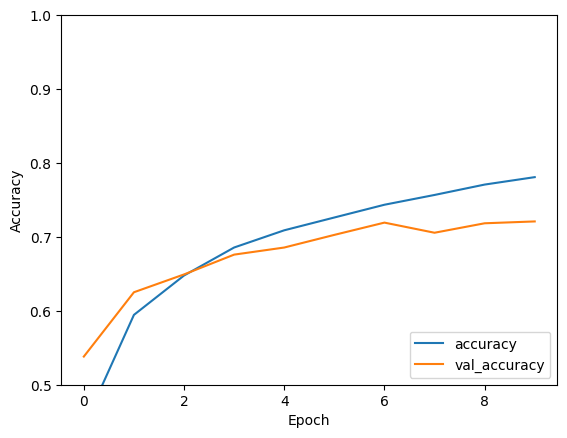

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7208999991416931


이 간단한 CNN은 70% 이상의 테스트 정확도를 달성했습니다. 몇 줄의 코드로는 나쁘지 않습니다! 다른 CNN 스타일은 Keras 서브클래싱 API 및 `tf.GradientTape`를 사용하는 <a>전문가를 위한 TensorFlow 2 빠른 시작</a> 예제를 확인하세요.